In [0]:
import pandas as pd
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [0]:
train_data = pd.read_csv("train.csv")
train_data.head()

user_uuid  ... Ratings
0  ae9a2bf4d42c67aed92df769580c0f3f30c9b823  ...     1.0
1  c67a6eda67d18898729657a6c53fb21f01961fea  ...     5.0
2  7438c2ffffa84ba1c1a2054b5d19fddd27d7ab09  ...     1.0
3  c5d0e5bb93e17ab698b04bb56229a2284e0d4e1b  ...     3.0
4  23ce012715a4cf5bfed7f0821e461f1593f47027  ...     5.0

[5 rows x 7 columns]

In [0]:
train_data.shape

(64150, 7)

In [0]:
for i in range(len(train_data.cuisine)):
  if type(train_data.cuisine[i]) == str:
    x = train_data.cuisine[i].strip("[").strip("]").replace(" ","").split("\'")
    x = ' '.join(x).split()
    train_data.cuisine[i] = x
  else:
    train_data.cuisine[i] = []
  if type(train_data.restaurant_features[i]) == str:  
    y = train_data.restaurant_features[i].strip("[").strip("]").replace(" ","").split("\'")
    y = ' '.join(y).split()
    train_data.restaurant_features[i] = y
  else:
    train_data.restaurant_features[i] = []

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [0]:
discounted = train_data.discounted
areas_hot = pd.get_dummies(train_data.area, prefix="area")
cuisine_hot = pd.get_dummies(train_data.cuisine.apply(pd.Series).stack(), prefix="cuisine").sum(level=0).drop(['cuisine_array([', 'cuisine_],dtype=object)', 'cuisine_,'], axis=1)
# cuisine_hot.rename(columns={"Grill": "Grill2"},inplace = True)
features_hot = pd.get_dummies(train_data.restaurant_features.apply(pd.Series).stack(), prefix="features").sum(level=0).drop(['features_array([', 'features_],', 'features_dtype=object)', 'features_],dtype=object)', 'features_,'], axis=1)
train_features = pd.concat([discounted, areas_hot, cuisine_hot, features_hot], axis = 1)
train_features = train_features.fillna(0)

In [0]:
restaurants_hot = pd.get_dummies(train_data.restaurant_uuid)
train_features2 = pd.concat([restaurants_hot,discounted, areas_hot, cuisine_hot, features_hot], axis = 1)
train_features2 = train_features2.fillna(0)
train_features2

00069db0b2846a182ad1d4915e15e71cce579b8e  ...  features_WorkOrStudy
0                                             0  ...                   0.0
1                                             0  ...                   0.0
2                                             0  ...                   0.0
3                                             0  ...                   0.0
4                                             0  ...                   0.0
...                                         ...  ...                   ...
64145                                         0  ...                   0.0
64146                                         0  ...                   0.0
64147                                         0  ...                   0.0
64148                                         0  ...                   0.0
64149                                         0  ...                   0.0

[64150 rows x 611 columns]

In [0]:
train_features_sorted = train_features2.reindex(sorted(train_features2.columns), axis=1)
train_features_sorted

00069db0b2846a182ad1d4915e15e71cce579b8e  ...  fec195aae08994eed95656b4928e861e7597b5cb
0                                             0  ...                                         0
1                                             0  ...                                         0
2                                             0  ...                                         0
3                                             0  ...                                         0
4                                             0  ...                                         0
...                                         ...  ...                                       ...
64145                                         0  ...                                         0
64146                                         0  ...                                         0
64147                                         0  ...                                         0
64148                                         0  ...                                         0
64149                                         0  ...                                         0

[64150 rows x 611 columns]

In [0]:
train_labels = train_data.Ratings

In [0]:
restId = train_data.restaurant_uuid

In [0]:
train_data_cleaned  = pd.concat([restId, train_features, train_labels], axis=1)

In [0]:
train_data_cleaned

restaurant_uuid  ...  Ratings
0      4e8c86cfdb5034d208be316e876e885e0effa536  ...      1.0
1      a23dd99b58683694a104fa68ccd08dffeb811556  ...      5.0
2      fc508f4360b4a509edf10fe53d01d0d96ed7dbfc  ...      1.0
3      8e9fd2e1d9da4d1b5e07a123a1ec7d7d915f28ec  ...      3.0
4      c2e51bf525d2b2c7a33c3d8ee017914c6400e975  ...      5.0
...                                         ...  ...      ...
64145  a8f1c42a5b27f032bbd69821b3d9941939db1ecf  ...      4.0
64146  a8f1c42a5b27f032bbd69821b3d9941939db1ecf  ...      5.0
64147  1404a8a5831559838c49b37a05fac84d554d208d  ...      3.0
64148  565770ff2aa097b55ee5c952c279a4aea9fd8281  ...      3.0
64149  a34f40794bf6dd83a22aa4a12ebcb5b6b1d496e6  ...      1.0

[64150 rows x 120 columns]

In [0]:
rating5=train_data_cleaned[train_data_cleaned['Ratings']==5]
rating4=train_data_cleaned[train_data_cleaned['Ratings']==4]
rating3=train_data_cleaned[train_data_cleaned['Ratings']==3]
rating2=train_data_cleaned[train_data_cleaned['Ratings']==2]
rating1=train_data_cleaned[train_data_cleaned['Ratings']==1]

In [0]:
ratings5_areas = rating5.filter(regex='area').sum()[rating5.filter(regex='area').sum()!=0]
ratings4_areas = rating4.filter(regex='area').sum()[rating4.filter(regex='area').sum()!=0]
ratings3_areas = rating3.filter(regex='area').sum()[rating3.filter(regex='area').sum()!=0]
ratings2_areas = rating2.filter(regex='area').sum()[rating2.filter(regex='area').sum()!=0]
ratings1_areas = rating1.filter(regex='area').sum()[rating1.filter(regex='area').sum()!=0]

In [0]:
ratings5_cuisines = rating5.filter(regex='cuisine').sum()[rating5.filter(regex='cuisine').sum()!=0]
ratings4_cuisines = rating4.filter(regex='cuisine').sum()[rating4.filter(regex='cuisine').sum()!=0]
ratings3_cuisines = rating3.filter(regex='cuisine').sum()[rating3.filter(regex='cuisine').sum()!=0]
ratings2_cuisines = rating2.filter(regex='cuisine').sum()[rating2.filter(regex='cuisine').sum()!=0]
ratings1_cuisines = rating1.filter(regex='cuisine').sum()[rating1.filter(regex='cuisine').sum()!=0]

In [0]:
ratings5_features = rating5.filter(regex='features').sum()[rating5.filter(regex='features').sum()!=0]
ratings4_features = rating4.filter(regex='features').sum()[rating4.filter(regex='features').sum()!=0]
ratings3_features = rating3.filter(regex='features').sum()[rating3.filter(regex='features').sum()!=0]
ratings2_features = rating2.filter(regex='features').sum()[rating2.filter(regex='features').sum()!=0]
ratings1_features = rating1.filter(regex='features').sum()[rating1.filter(regex='features').sum()!=0]

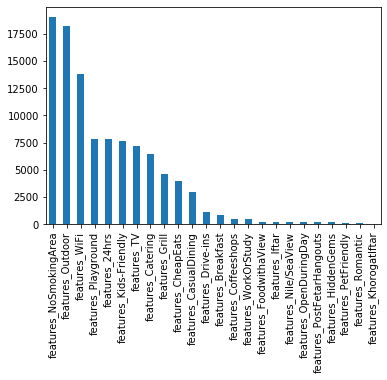

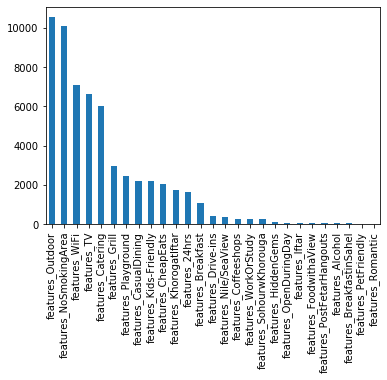

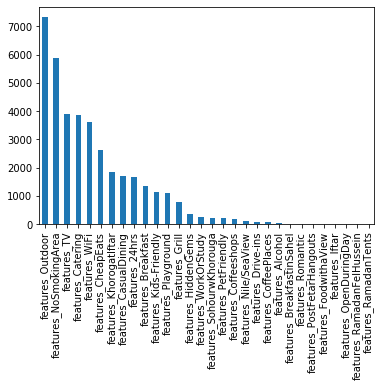

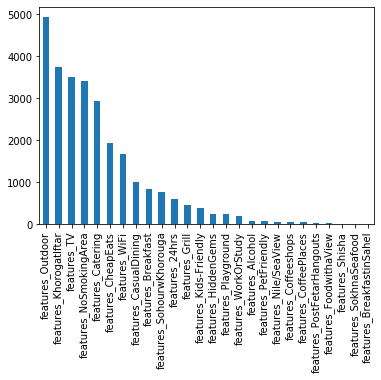

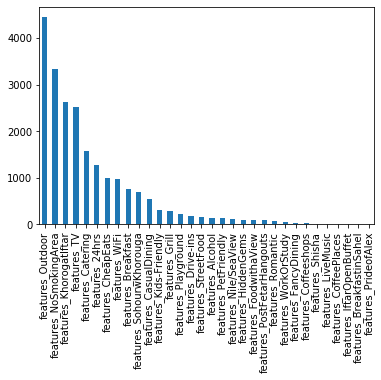

In [0]:
ratings5_features.sort_values(ascending=False).plot(kind='bar')
plt.show()
ratings4_features.sort_values(ascending=False).plot(kind='bar')
plt.show()
ratings3_features.sort_values(ascending=False).plot(kind='bar')
plt.show()
ratings2_features.sort_values(ascending=False).plot(kind='bar')
plt.show()
ratings1_features.sort_values(ascending=False).plot(kind='bar')
plt.show()

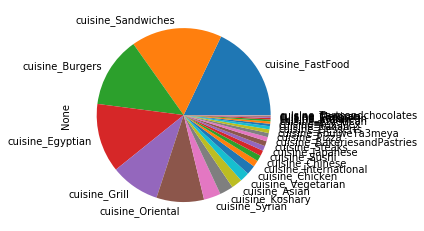

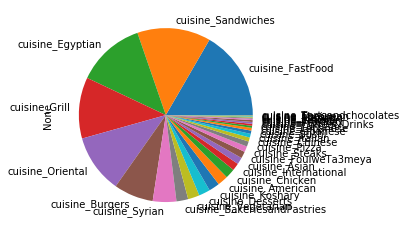

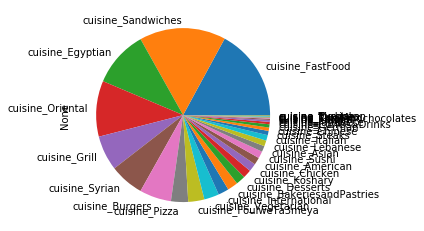

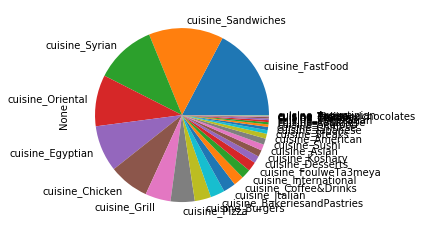

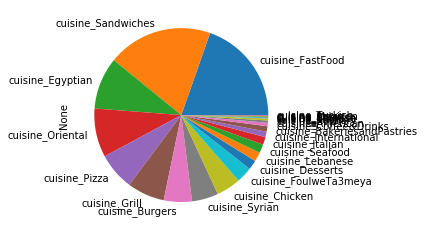

In [0]:
ratings5_cuisines.sort_values(ascending=False).plot(kind='pie')
plt.show()
ratings4_cuisines.sort_values(ascending=False).plot(kind='pie')
plt.show()
ratings3_cuisines.sort_values(ascending=False).plot(kind='pie')
plt.show()
ratings2_cuisines.sort_values(ascending=False).plot(kind='pie')
plt.show()
ratings1_cuisines.sort_values(ascending=False).plot(kind='pie')
plt.show()

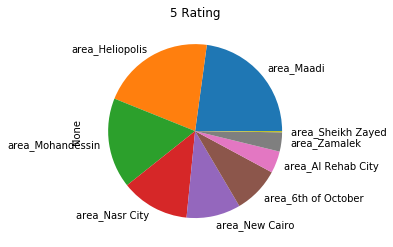

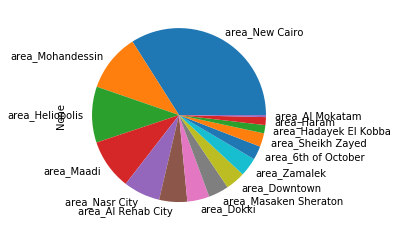

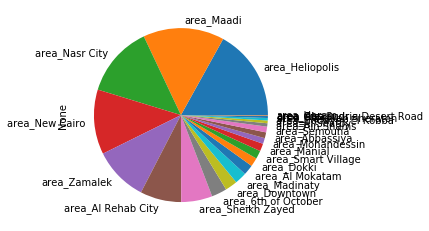

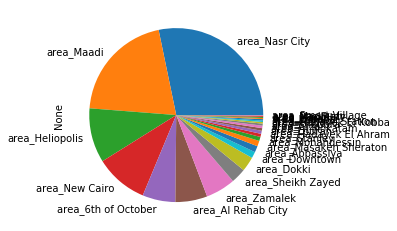

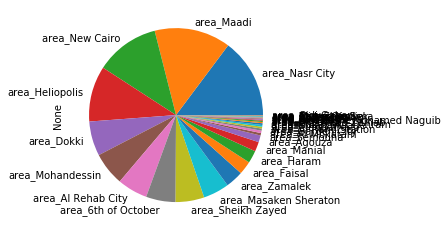

In [0]:
ratings5_areas.sort_values(ascending=False).plot(kind='pie', title="5 Rating")
plt.show()
ratings4_areas.sort_values(ascending=False).plot(kind='pie')
plt.show()
ratings3_areas.sort_values(ascending=False).plot(kind='pie')
plt.show()
ratings2_areas.sort_values(ascending=False).plot(kind='pie')
plt.show()
ratings1_areas.sort_values(ascending=False).plot(kind='pie')
plt.show()

In [0]:
area_cuisines = pd.concat([train_data.area, cuisine_hot], axis=1)

In [0]:
area_cuisines2 = area_cuisines.groupby('area').sum()

In [0]:
weighted_cuisine = area_cuisines.area
for i in area_cuisines.loc[:,'cuisine_American':'cuisine_Vegetarian'].columns:
  mul = area_cuisines[i]*train_data_cleaned.Ratings
  mul = mul.rename(i)
  weighted_cuisine = pd.concat([weighted_cuisine, mul], axis=1)

In [0]:
cuisine_ratings = weighted_cuisine.drop('area', axis=1).mean()
cuisine_ratings = cuisine_ratings / cuisine_ratings.max()
top_ten_cuisines = cuisine_ratings.sort_values(ascending=False)[:10]

In [0]:
donut(top_ten_cuisines.index[:10], top_ten_cuisines.values[:10], "Top 10 Cuisines")

NameError: ignored

In [0]:
weighted_cuisine = weighted_cuisine.groupby('area').sum()

In [0]:
weighted_cuisine= weighted_cuisine/area_cuisines2

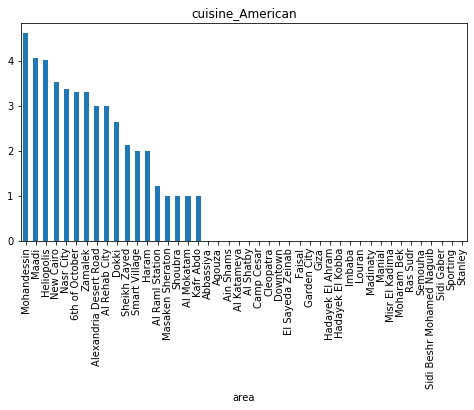

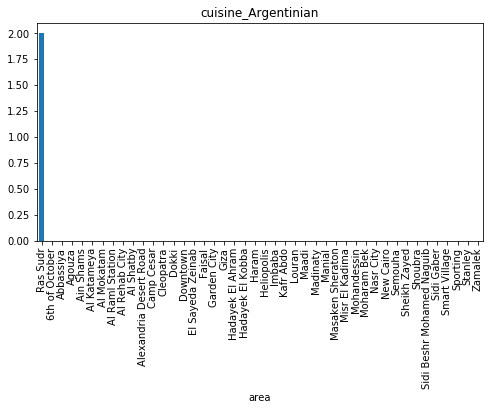

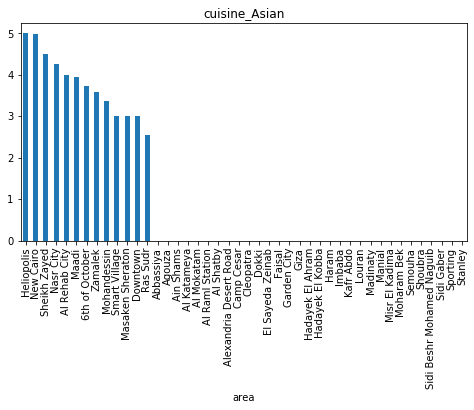

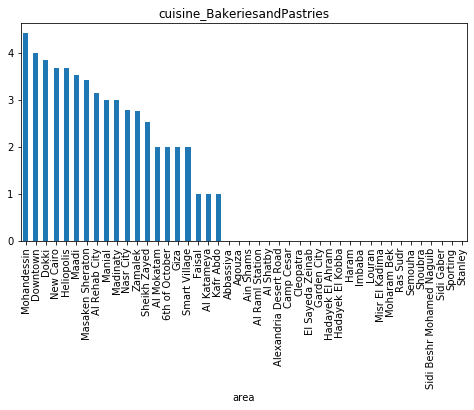

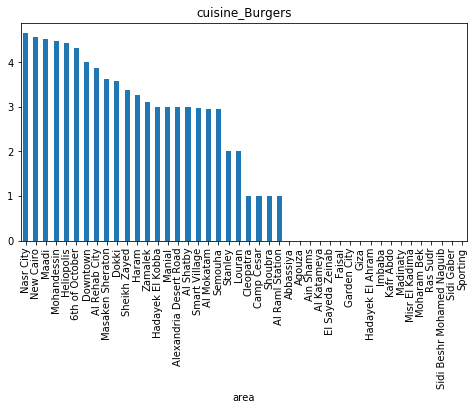

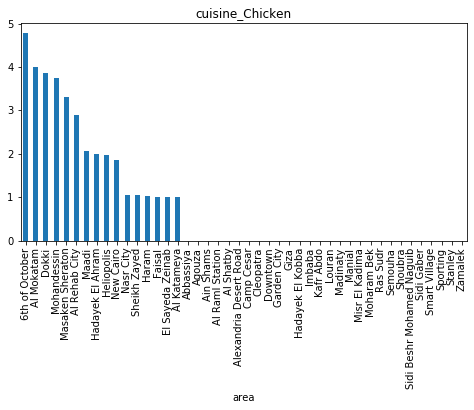

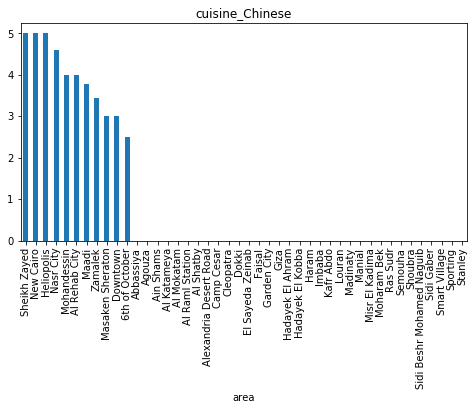

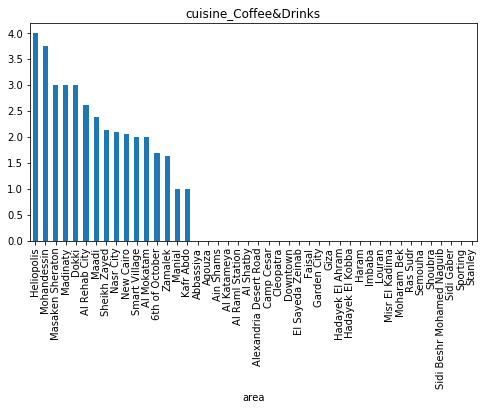

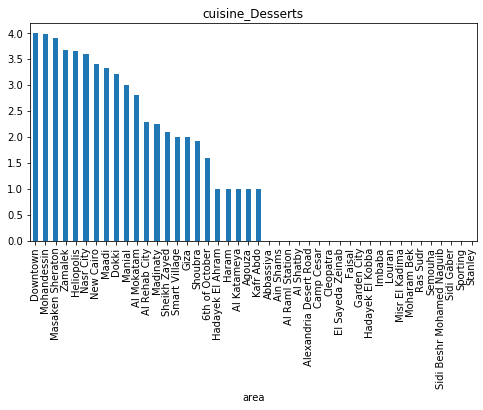

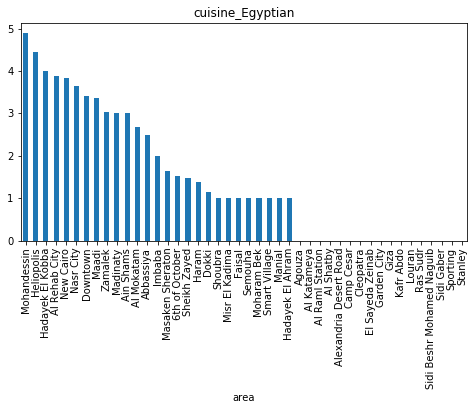

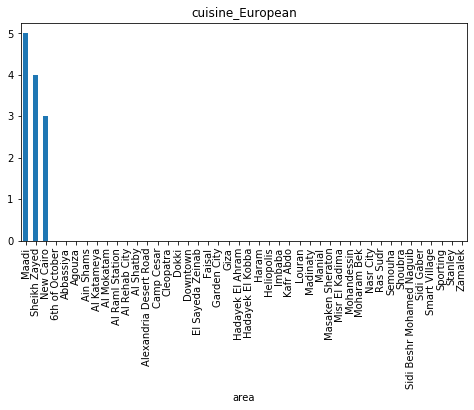

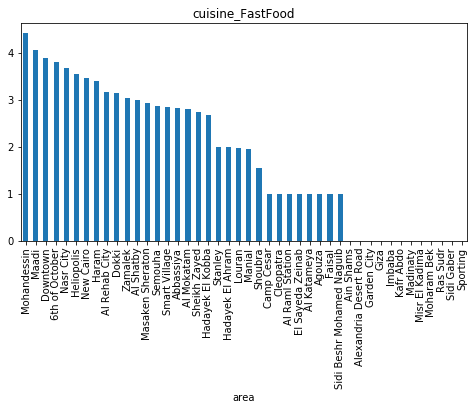

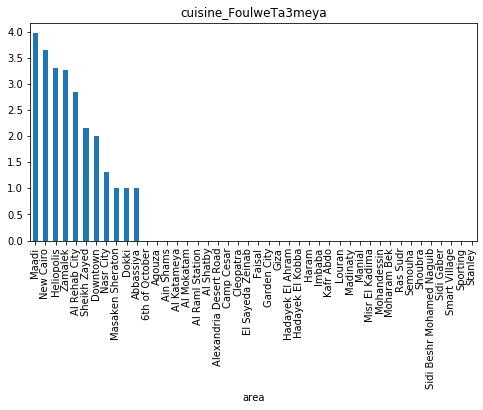

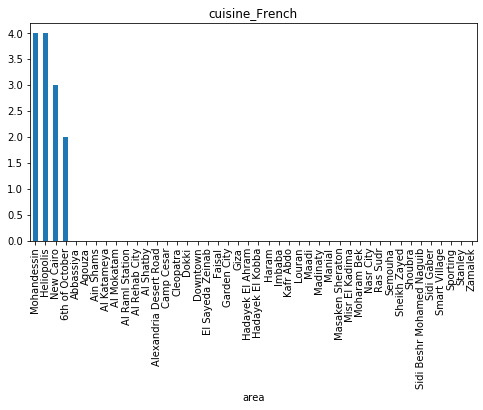

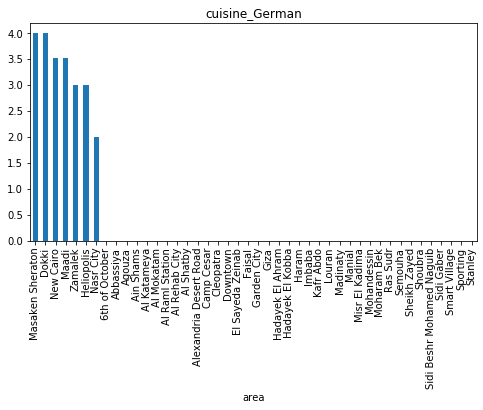

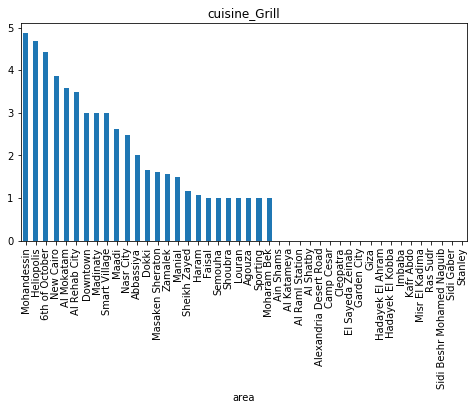

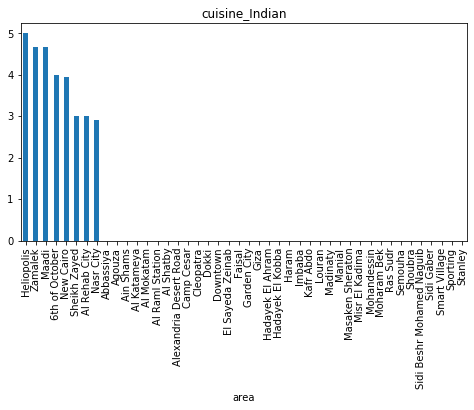

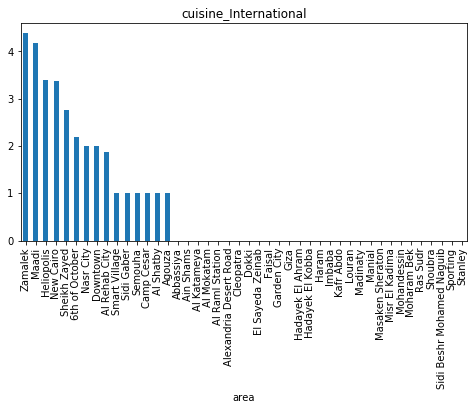

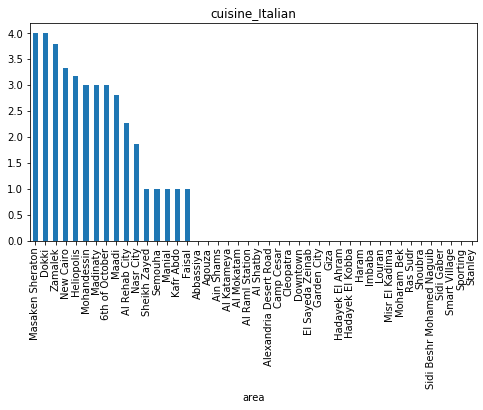

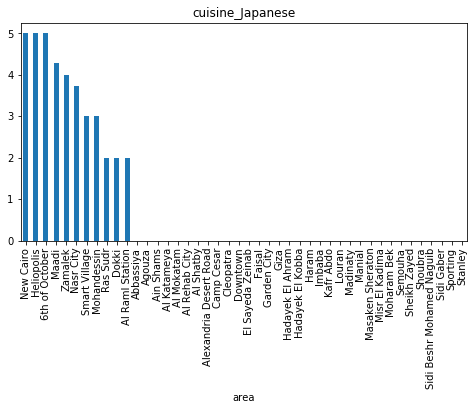

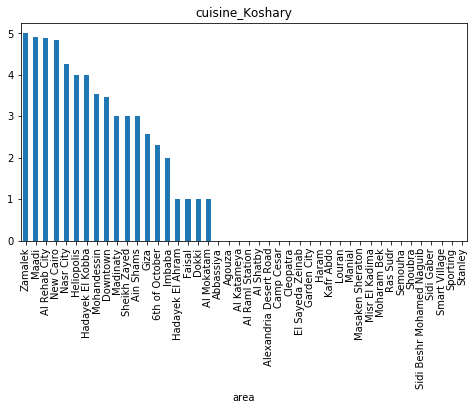

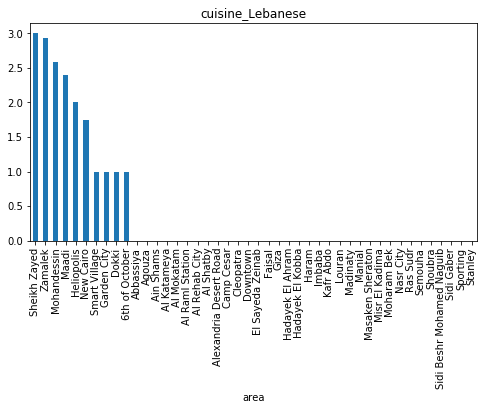

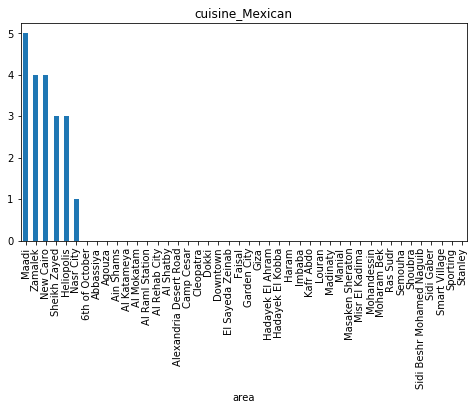

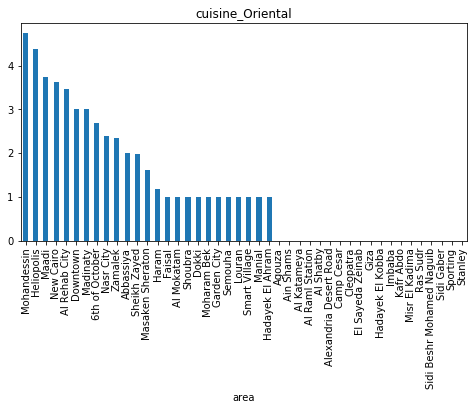

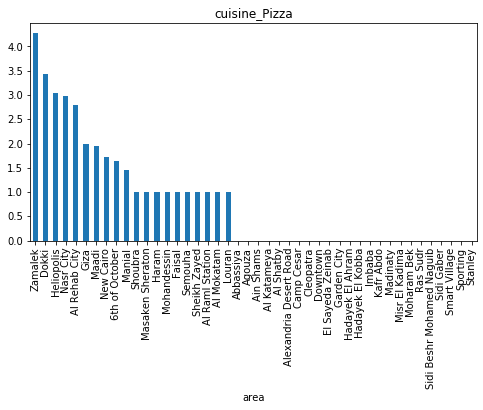

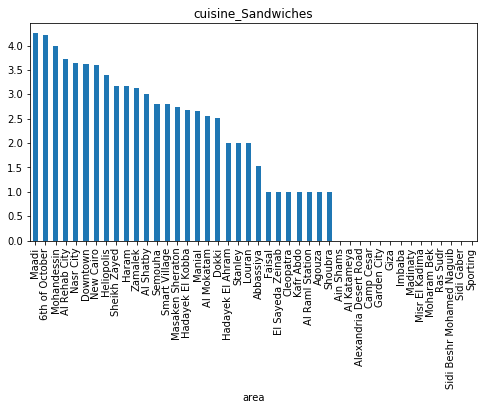

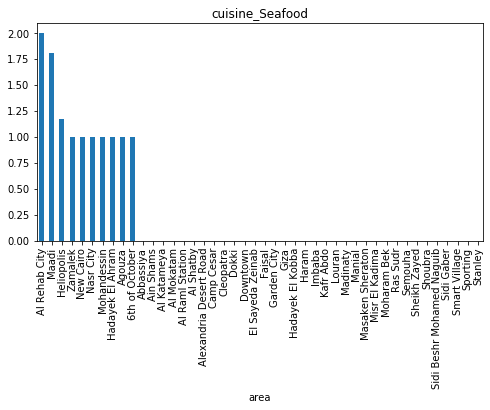

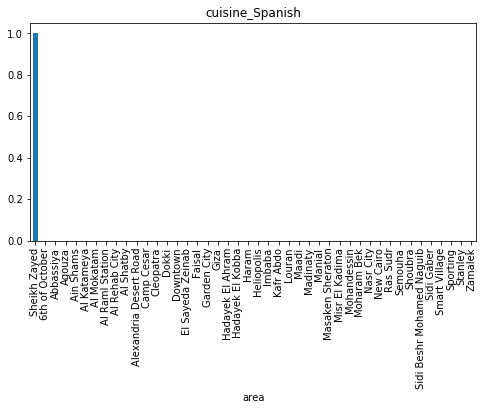

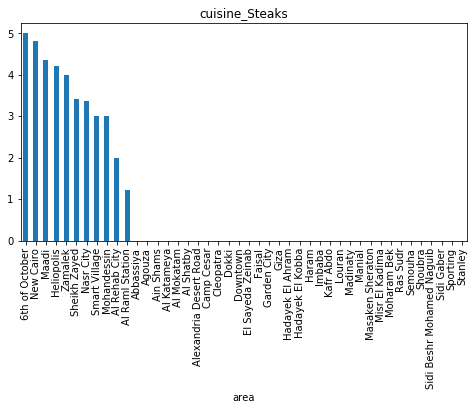

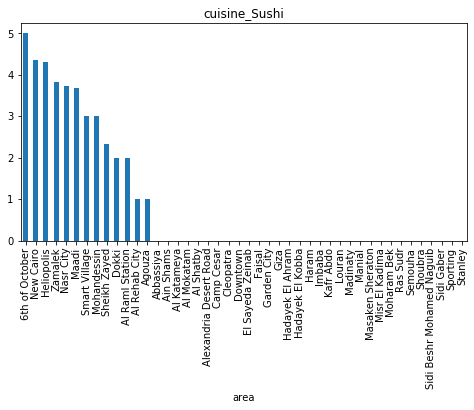

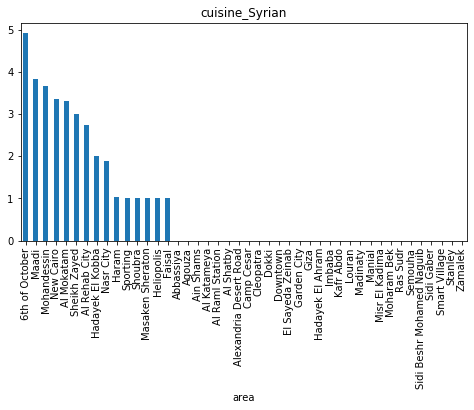

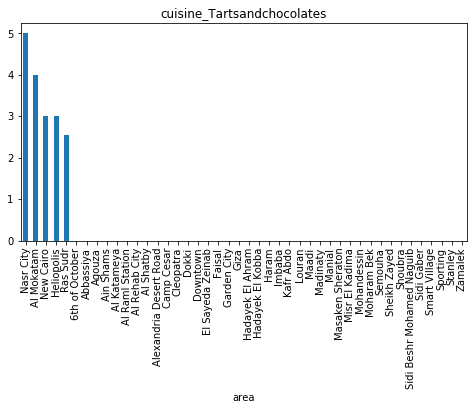

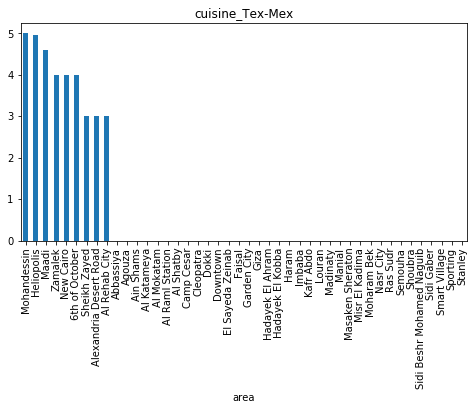

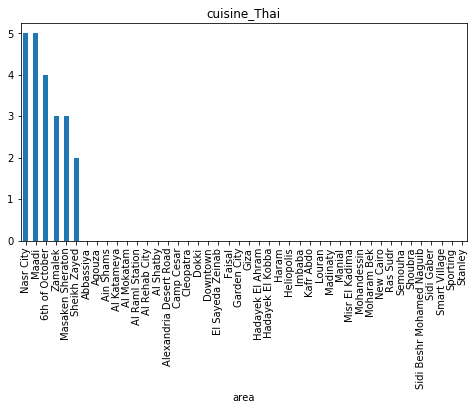

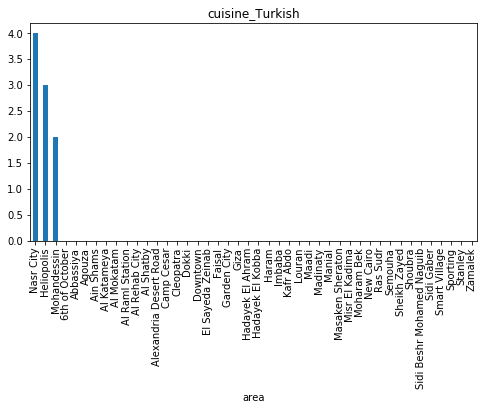

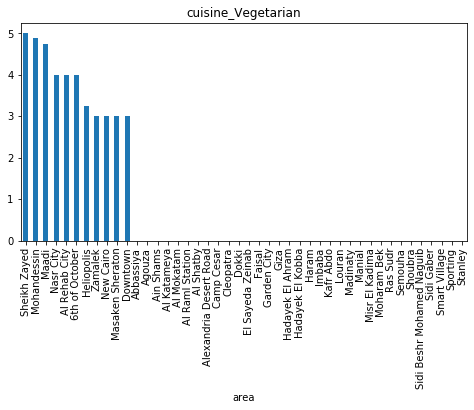

In [0]:
for i in range(len(weighted_cuisine.columns)):
  weighted_cuisine[weighted_cuisine.columns[i]].sort_values(ascending=False).plot(kind='bar', title=weighted_cuisine.columns[i], figsize=(8,4))
  plt.figsize=(20,20)
  plt.show()

In [0]:
features_area = pd.concat([train_data.area, features_hot], axis=1)
weighted_features2 = features_area.groupby('area').sum()
weighted_features2

features_24hrs  ...  features_WorkOrStudy
area                                       ...                      
6th of October                     1191.0  ...                   1.0
Abbassiya                             0.0  ...                   0.0
Agouza                                0.0  ...                   0.0
Ain Shams                             0.0  ...                   0.0
Al Katameya                           0.0  ...                   0.0
Al Mokatam                          142.0  ...                   1.0
Al Raml Station                       9.0  ...                   0.0
Al Rehab City                       478.0  ...                  98.0
Al Shatby                            53.0  ...                   0.0
Alexandria Desert Road                0.0  ...                   0.0
Camp Cesar                            1.0  ...                   0.0
Cleopatra                            30.0  ...                   0.0
Dokki                               541.0  ...                   4.0
Downtown                            273.0  ...                   0.0
El Sayeda Zeinab                      0.0  ...                   0.0
Faisal                               93.0  ...                   0.0
Garden City                           0.0  ...                   0.0
Giza                                 39.0  ...                   0.0
Hadayek El Ahram                      5.0  ...                   0.0
Hadayek El Kobba                     47.0  ...                   0.0
Haram                               228.0  ...                   0.0
Heliopolis                         1512.0  ...                 133.0
Imbaba                               18.0  ...                   0.0
Kafr Abdo                             0.0  ...                   0.0
Louran                               41.0  ...                   0.0
Maadi                              1716.0  ...                 456.0
Madinaty                              0.0  ...                   2.0
Manial                              219.0  ...                   0.0
Masaken Sheraton                    405.0  ...                  47.0
Misr El Kadima                        0.0  ...                   0.0
Mohandessin                         760.0  ...                 109.0
Moharam Bek                           3.0  ...                   0.0
Nasr City                          2240.0  ...                  54.0
New Cairo                          1564.0  ...                 105.0
Ras Sudr                              0.0  ...                   0.0
Semouha                             111.0  ...                   0.0
Sheikh Zayed                        376.0  ...                  64.0
Shoubra                               2.0  ...                   0.0
Sidi Beshr Mohamed Naguib             0.0  ...                   0.0
Sidi Gaber                            0.0  ...                   0.0
Smart Village                       112.0  ...                   1.0
Sporting                              0.0  ...                   0.0
Stanley                              47.0  ...                   0.0
Zamalek                             738.0  ...                 154.0

[44 rows x 37 columns]

In [0]:
weighted_features


area  features_24hrs  ...  features_WiFi  features_WorkOrStudy
0        Sheikh Zayed             0.0  ...            1.0                   0.0
1           New Cairo             0.0  ...            0.0                   0.0
2        Sheikh Zayed             0.0  ...            0.0                   0.0
3           Nasr City             3.0  ...            0.0                   0.0
4         Mohandessin             0.0  ...            0.0                   0.0
...               ...             ...  ...            ...                   ...
64145           Dokki             4.0  ...            4.0                   0.0
64146  6th of October             5.0  ...            5.0                   0.0
64147       New Cairo             0.0  ...            0.0                   0.0
64148      Heliopolis             0.0  ...            0.0                   0.0
64149       Nasr City             0.0  ...            0.0                   0.0

[64150 rows x 38 columns]

In [0]:
weighted_features = train_data.area
for i in features_hot.columns:
  mul = features_hot[i]*train_data_cleaned.Ratings
  mul = mul.rename(i)
  weighted_features = pd.concat([weighted_features, mul],axis=1)

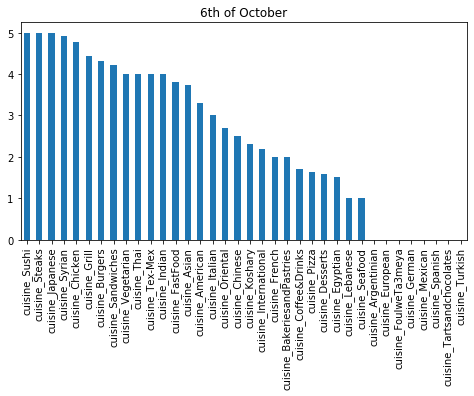

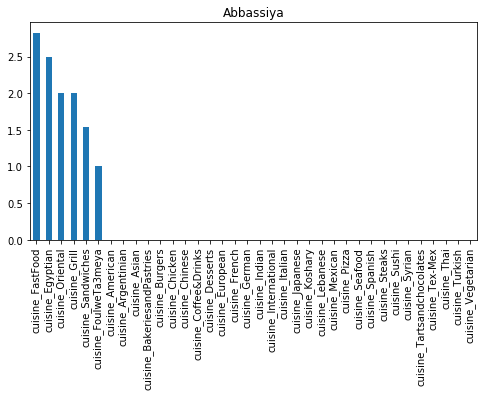

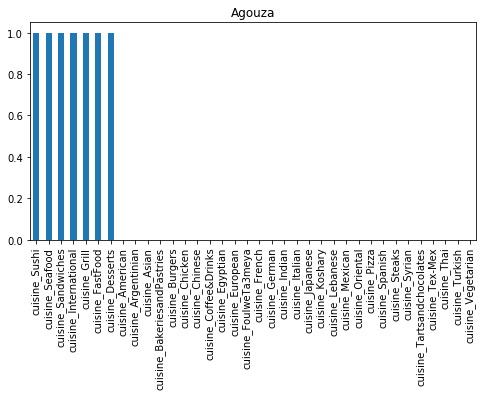

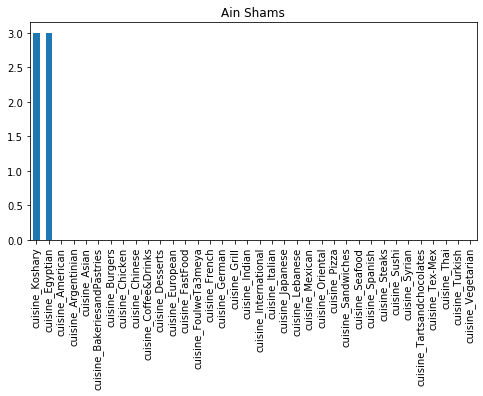

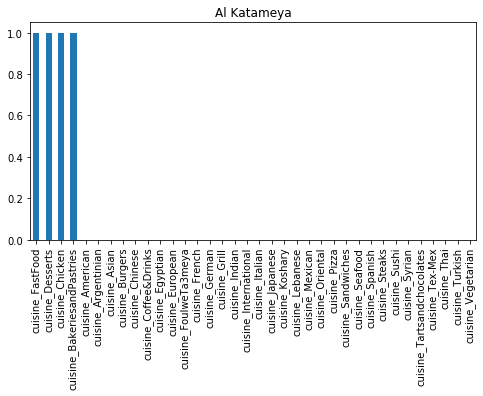

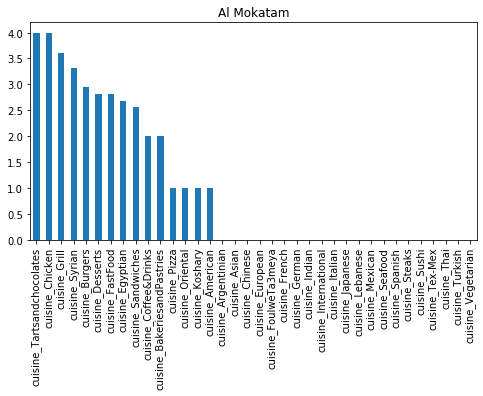

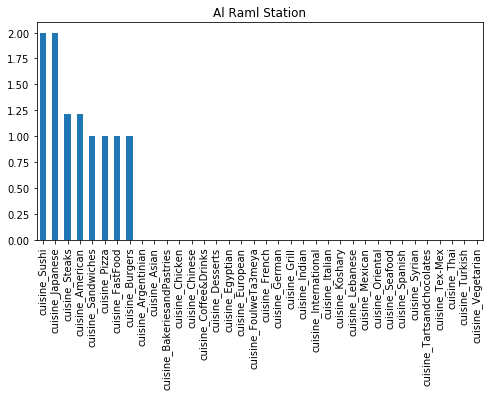

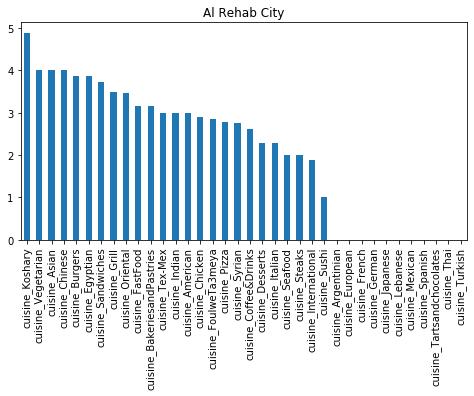

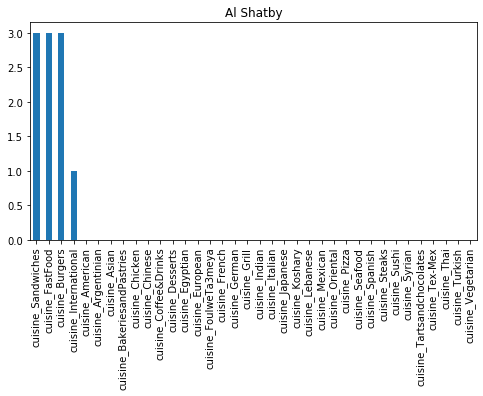

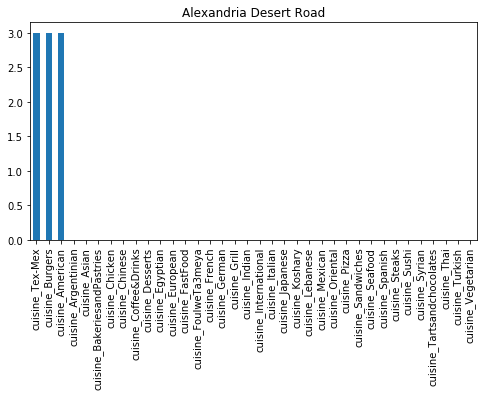

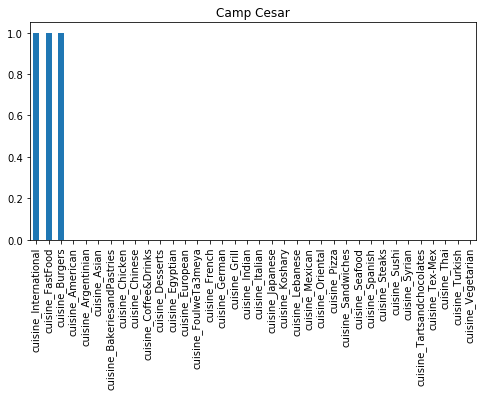

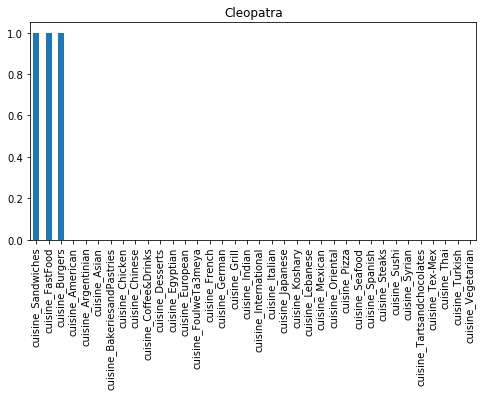

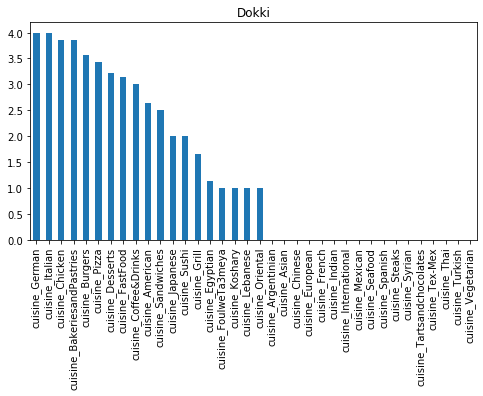

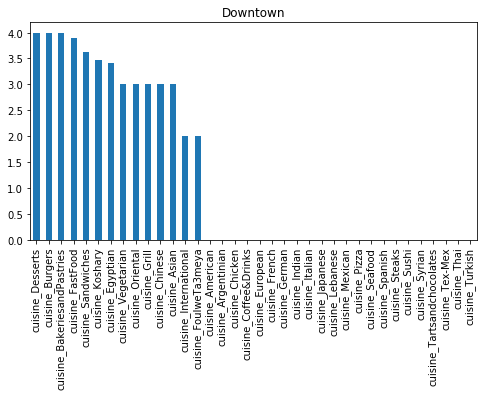

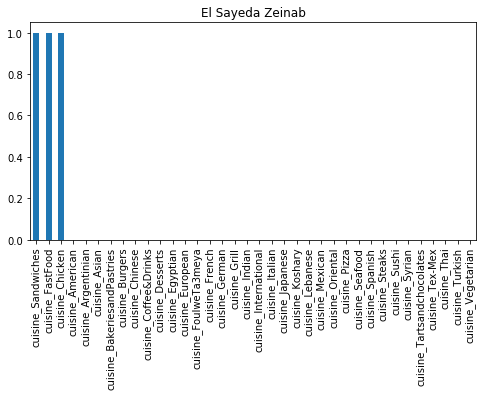

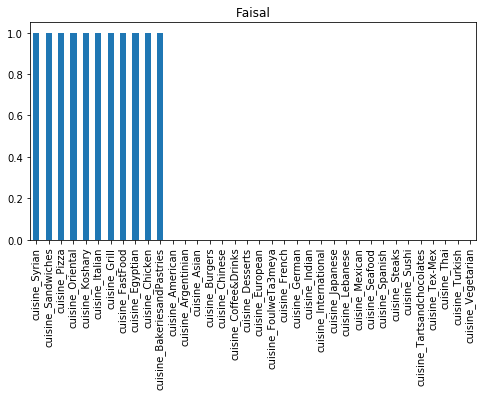

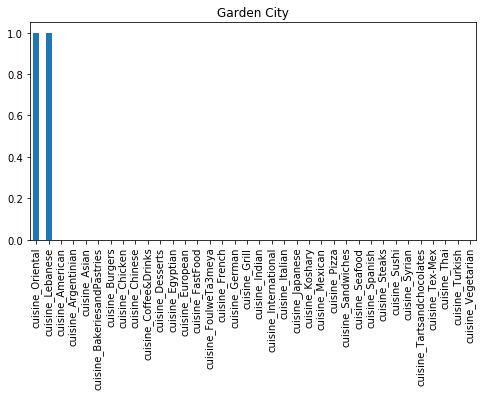

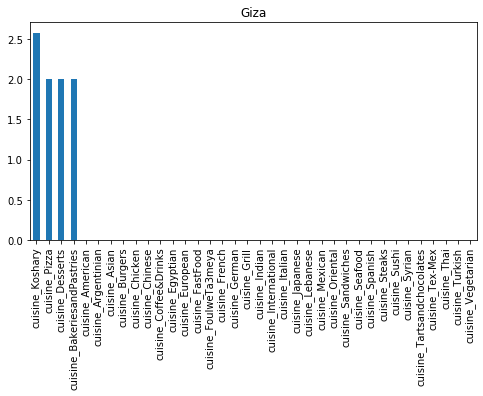

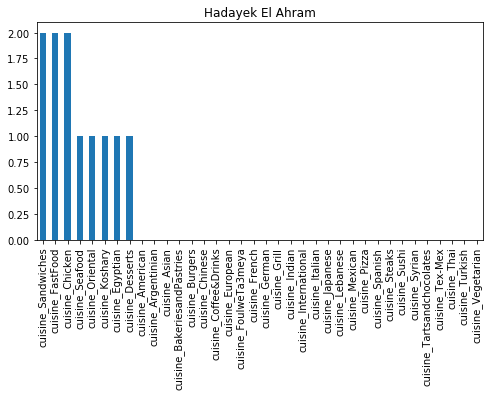

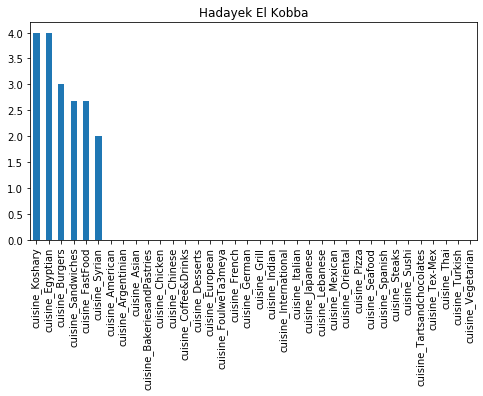

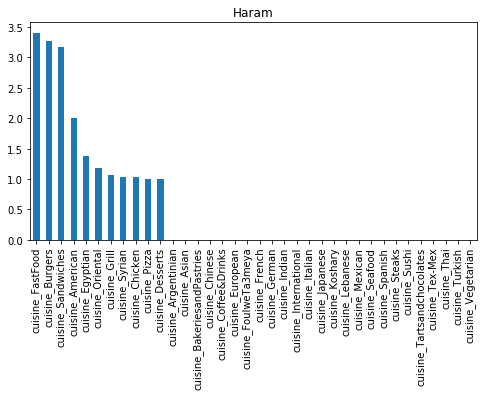

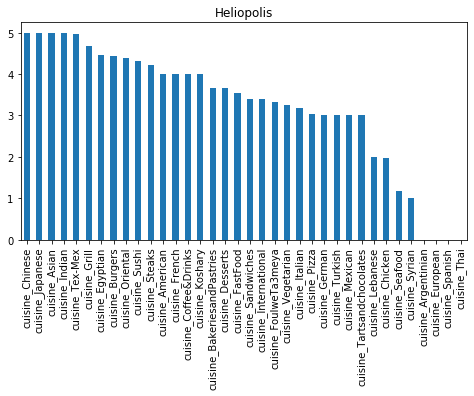

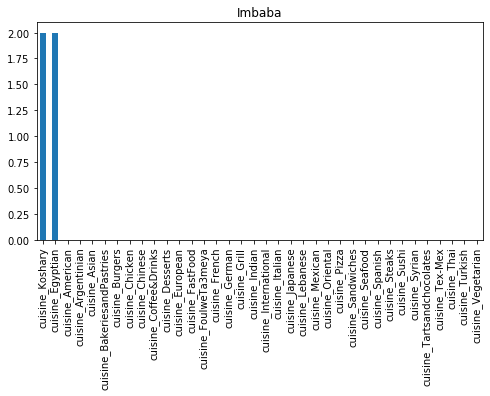

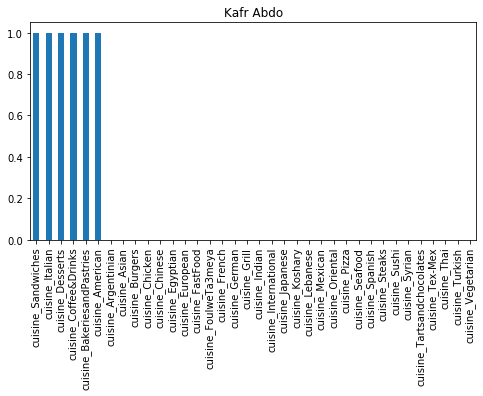

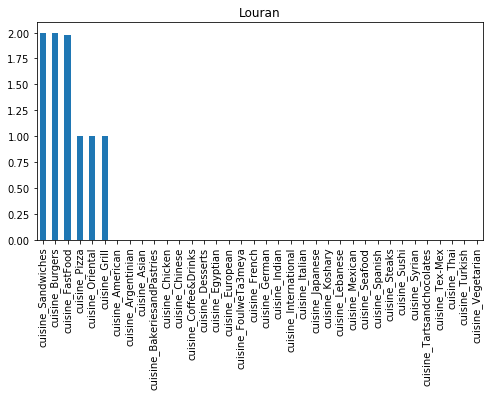

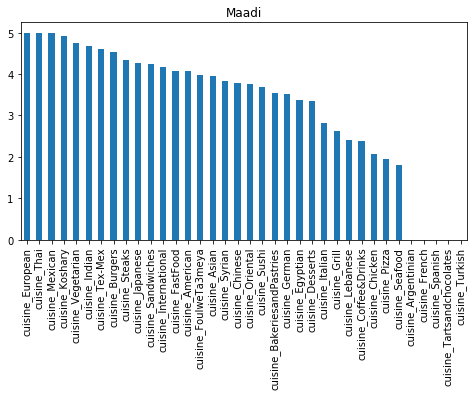

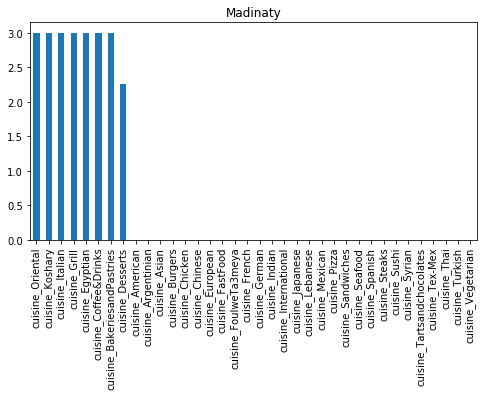

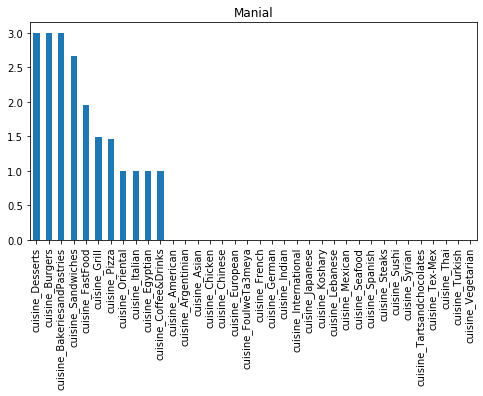

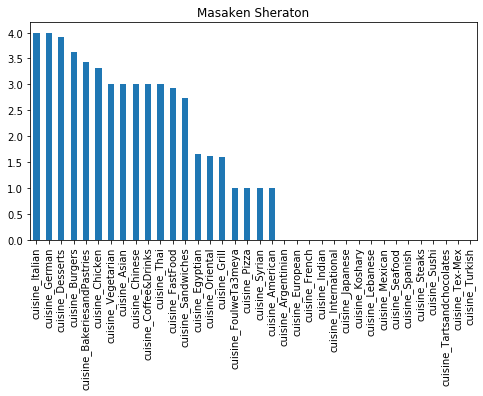

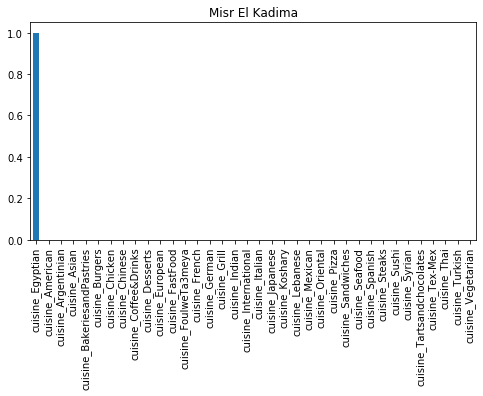

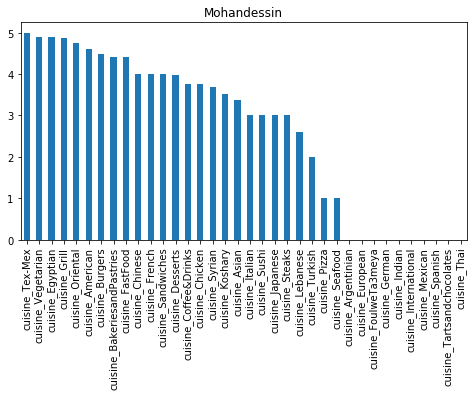

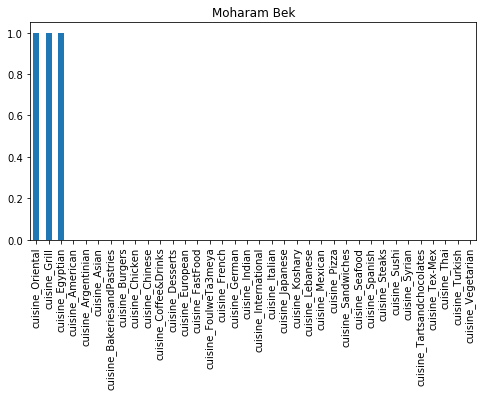

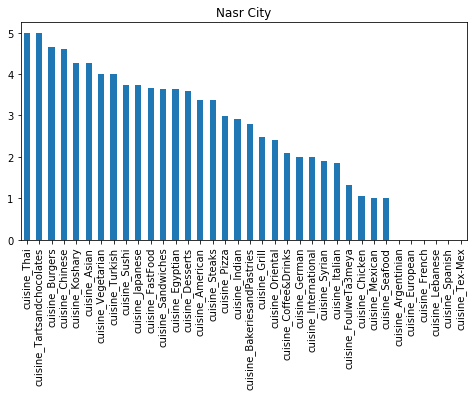

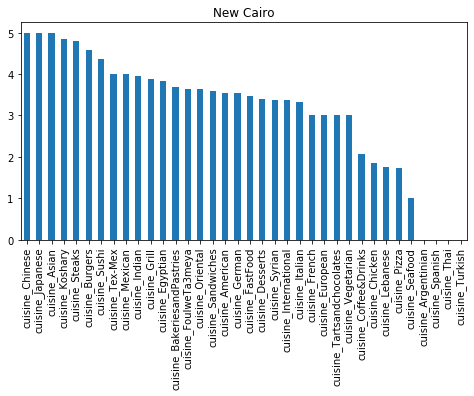

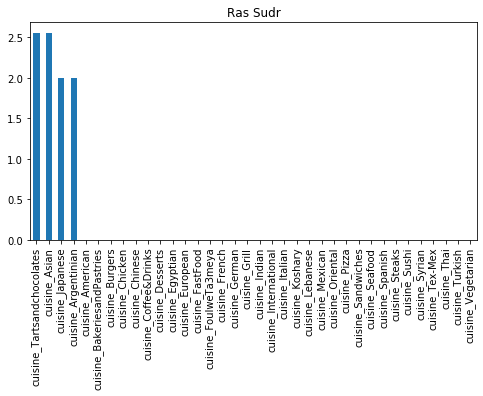

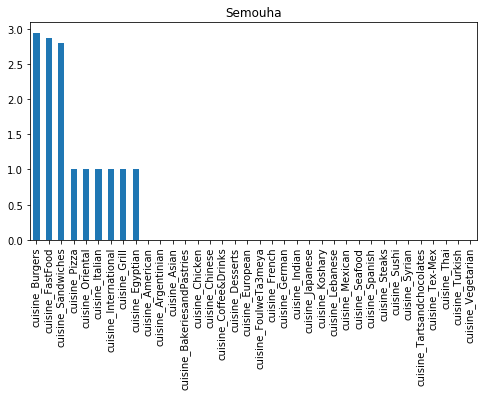

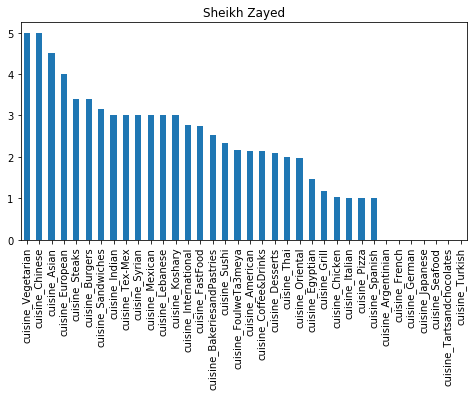

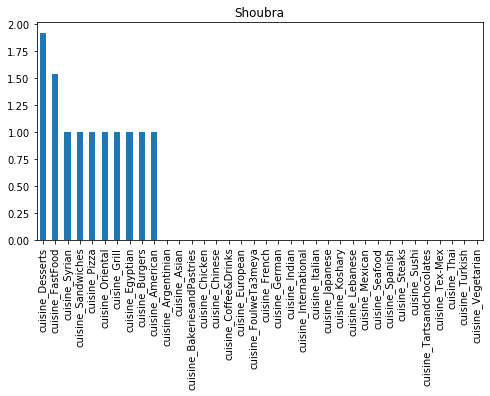

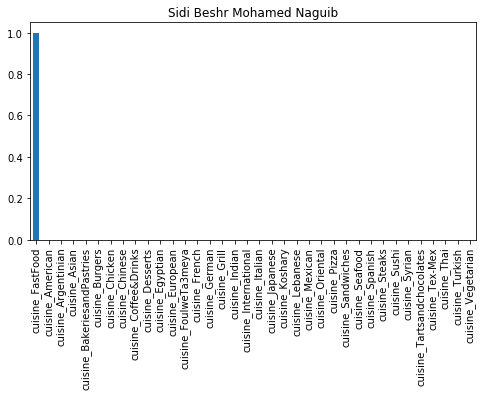

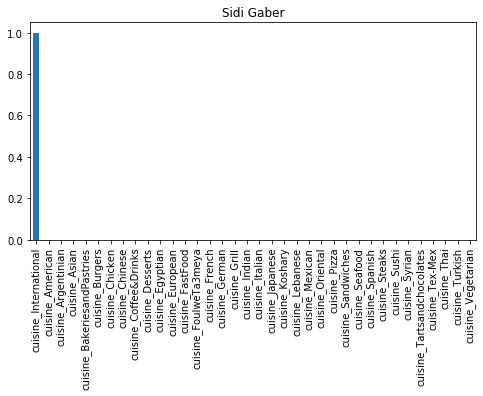

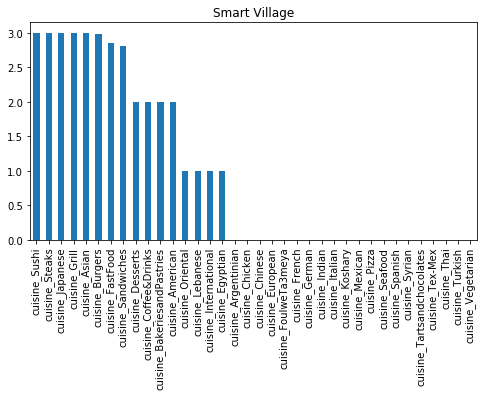

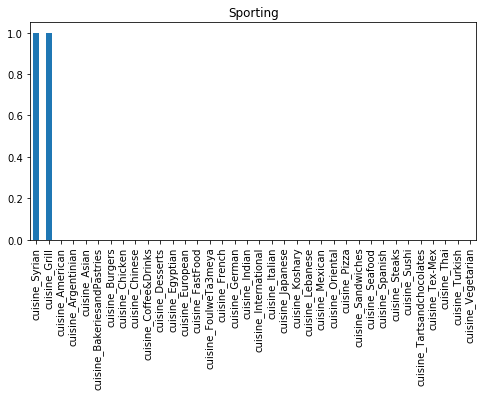

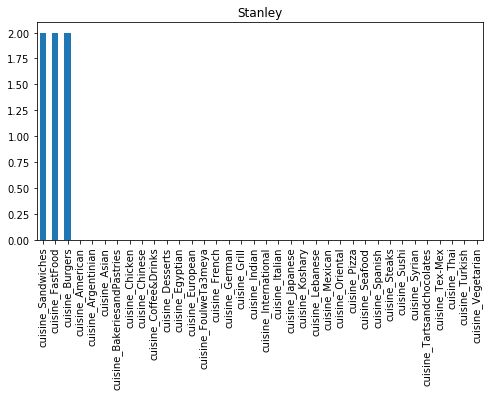

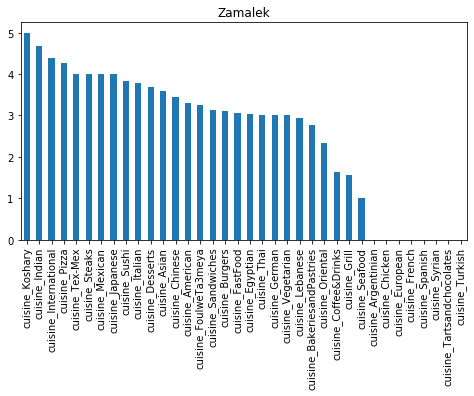

In [0]:
for i in range(len(weighted_cuisine.index)):
  weighted_cuisine.loc[weighted_cuisine.index[i]].sort_values(ascending=False).plot(kind='bar', title=weighted_cuisine.index[i], figsize=(8,4))
  plt.show()

In [0]:
features_ratings = weighted_features.drop('area', axis=1).mean()
features_ratings = features_ratings / features_ratings.max()

In [0]:
top_ten_features = features_ratings.sort_values(ascending=False)[:10]

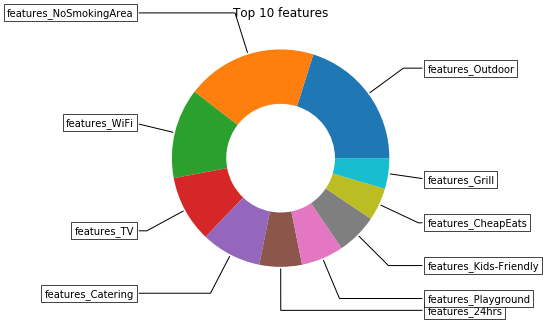

In [0]:
donut(top_ten_features.index[:10], top_ten_features.values[:10], "Top 10 features")

In [0]:
weighted_features = weighted_features.groupby('area').sum()

In [0]:
weighted_features

features_24hrs  ...  features_WorkOrStudy
area                                       ...                      
6th of October                     4544.0  ...                   3.0
Abbassiya                             0.0  ...                   0.0
Agouza                                0.0  ...                   0.0
Ain Shams                             0.0  ...                   0.0
Al Katameya                           0.0  ...                   0.0
Al Mokatam                          368.0  ...                   2.0
Al Raml Station                       9.0  ...                   0.0
Al Rehab City                      2390.0  ...                 476.0
Al Shatby                           159.0  ...                   0.0
Alexandria Desert Road                0.0  ...                   0.0
Camp Cesar                            1.0  ...                   0.0
Cleopatra                            30.0  ...                   0.0
Dokki                              1912.0  ...                  12.0
Downtown                           1082.0  ...                   0.0
El Sayeda Zeinab                      0.0  ...                   0.0
Faisal                               93.0  ...                   0.0
Garden City                           0.0  ...                   0.0
Giza                                 85.0  ...                   0.0
Hadayek El Ahram                      5.0  ...                   0.0
Hadayek El Kobba                    141.0  ...                   0.0
Haram                               852.0  ...                   0.0
Heliopolis                         7459.0  ...                 592.0
Imbaba                               36.0  ...                   0.0
Kafr Abdo                             0.0  ...                   0.0
Louran                               82.0  ...                   0.0
Maadi                              7773.0  ...                1517.0
Madinaty                              0.0  ...                   6.0
Manial                              515.0  ...                   0.0
Masaken Sheraton                   1110.0  ...                 161.0
Misr El Kadima                        0.0  ...                   0.0
Mohandessin                        3633.0  ...                 539.0
Moharam Bek                           3.0  ...                   0.0
Nasr City                          9616.0  ...                 168.0
New Cairo                          6729.0  ...                 459.0
Ras Sudr                              0.0  ...                   0.0
Semouha                             333.0  ...                   0.0
Sheikh Zayed                       1213.0  ...                 189.0
Shoubra                               2.0  ...                   0.0
Sidi Beshr Mohamed Naguib             0.0  ...                   0.0
Sidi Gaber                            0.0  ...                   0.0
Smart Village                       336.0  ...                   2.0
Sporting                              0.0  ...                   0.0
Stanley                              94.0  ...                   0.0
Zamalek                            2476.0  ...                 490.0

[44 rows x 37 columns]

In [0]:
weighted_features = weighted_features/weighted_features2

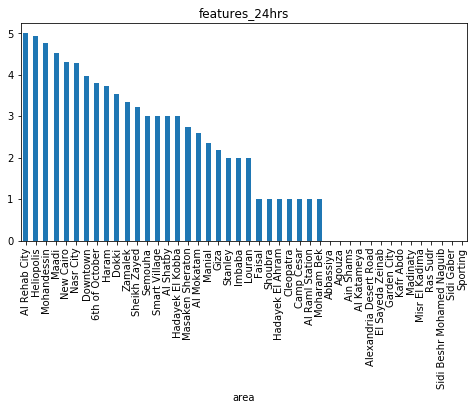

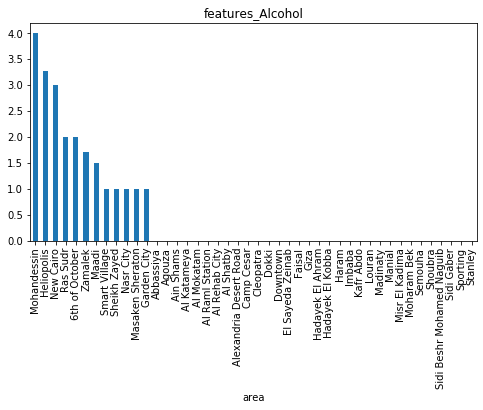

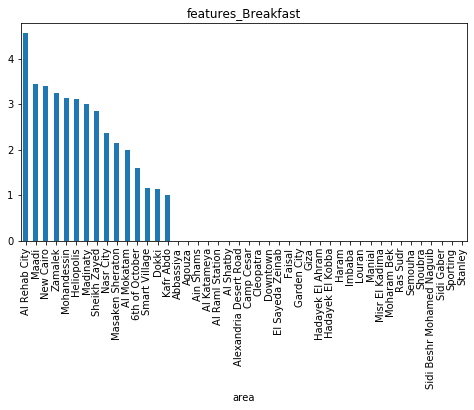

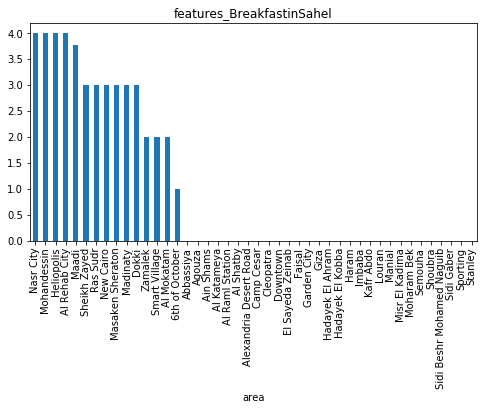

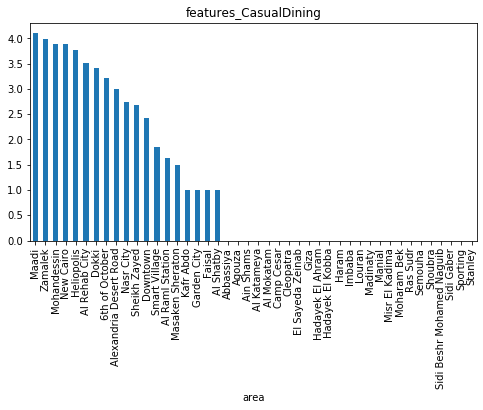

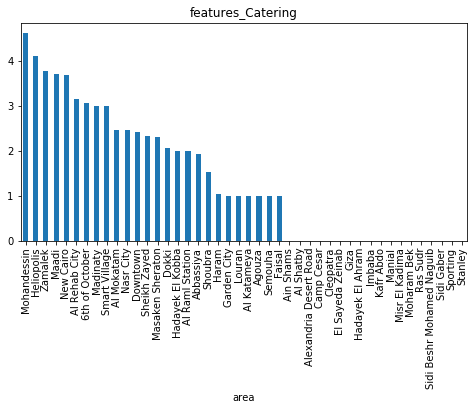

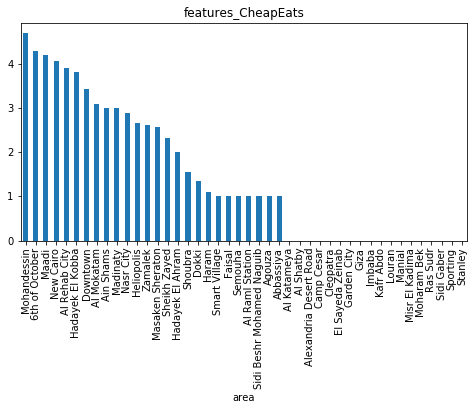

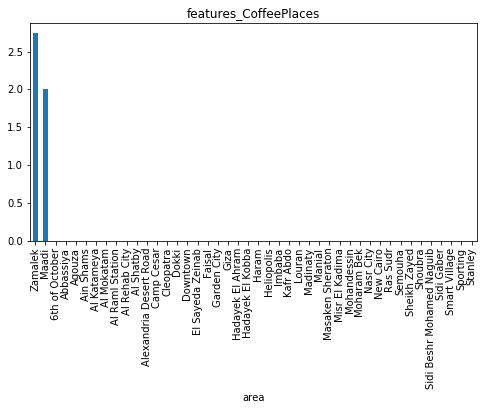

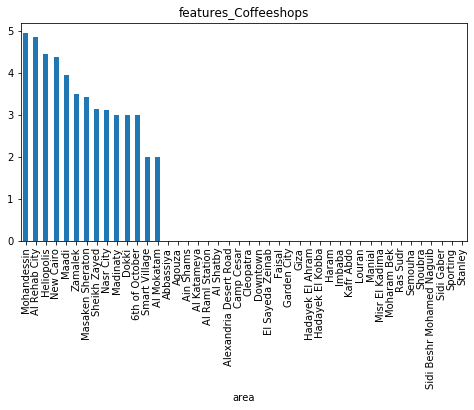

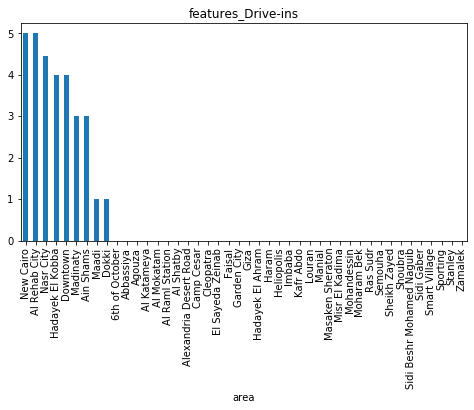

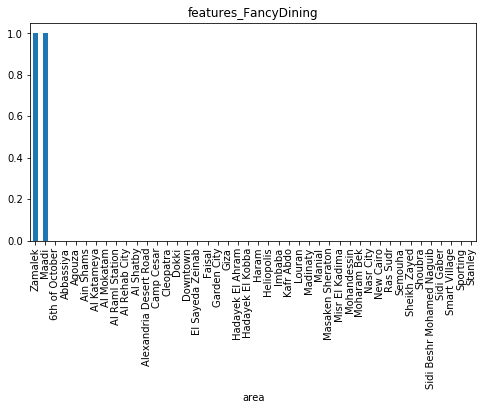

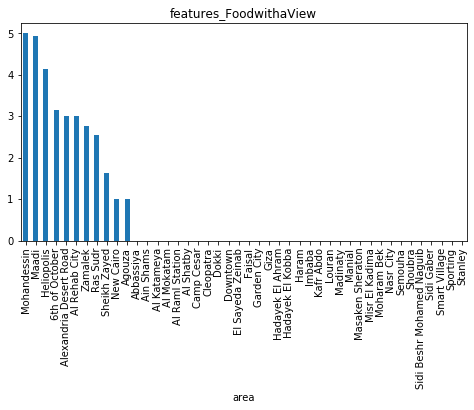

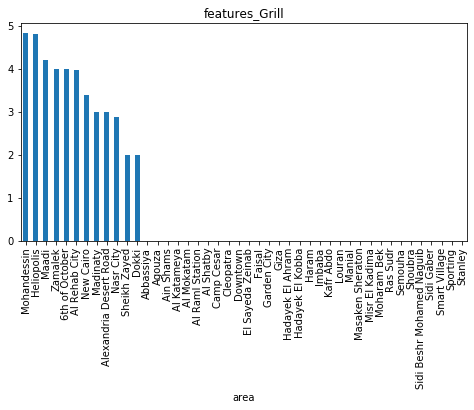

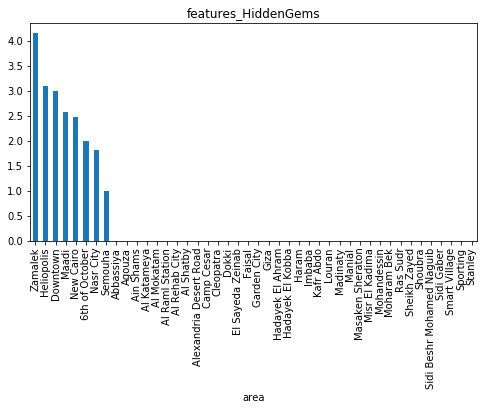

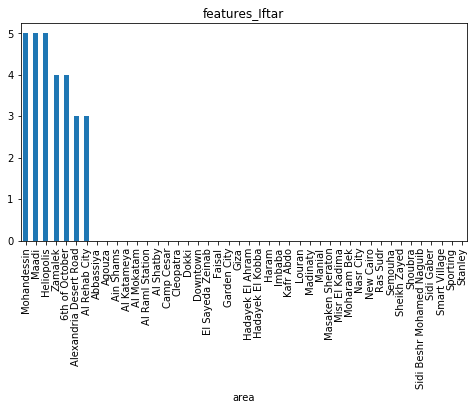

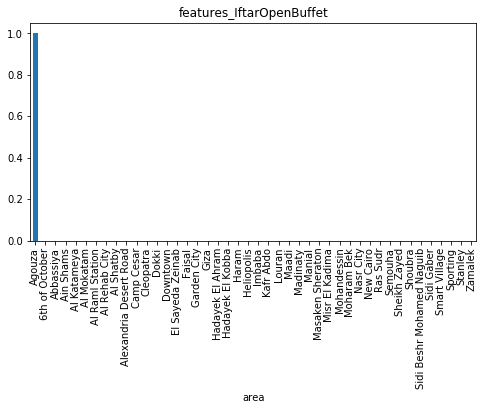

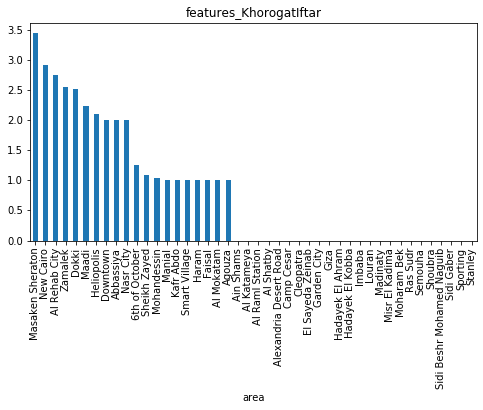

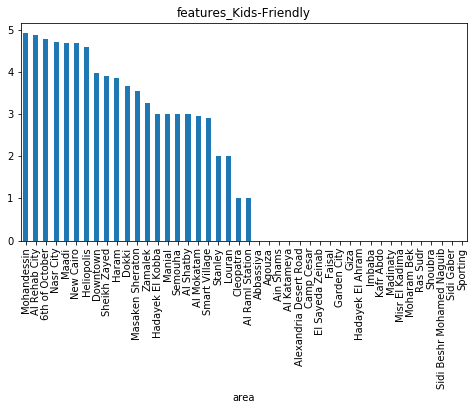

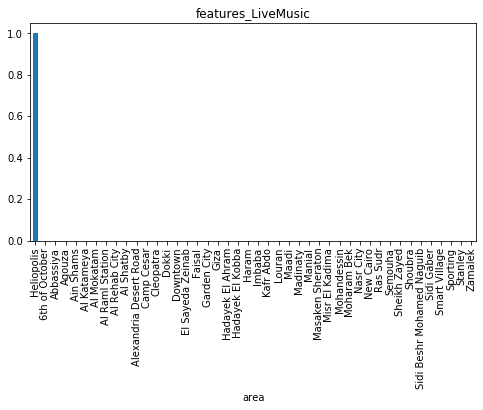

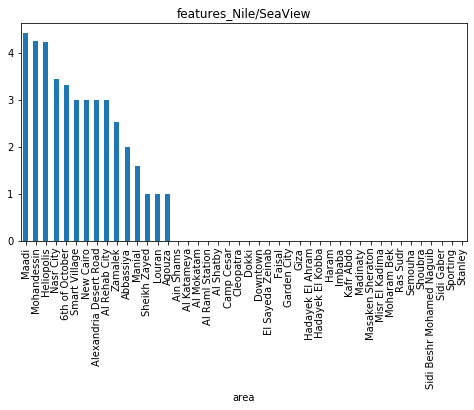

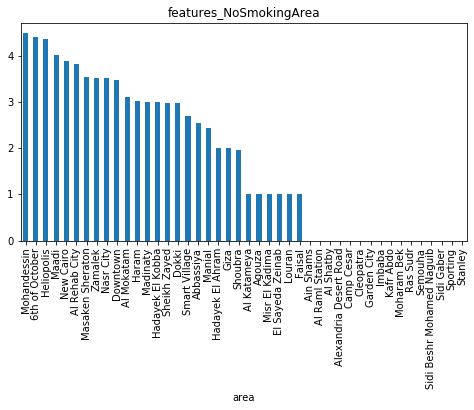

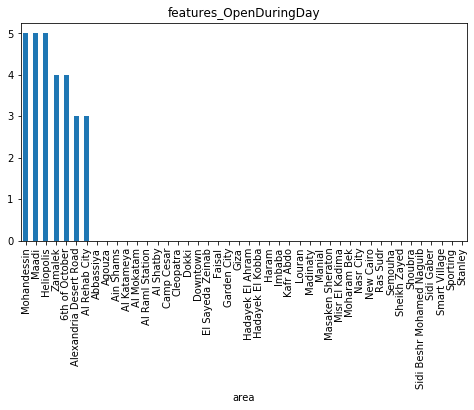

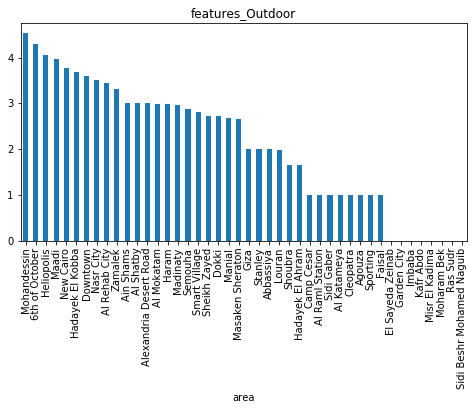

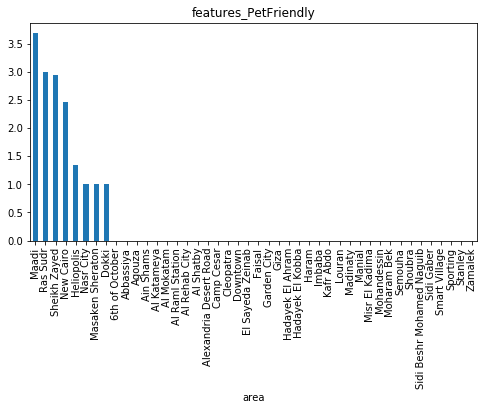

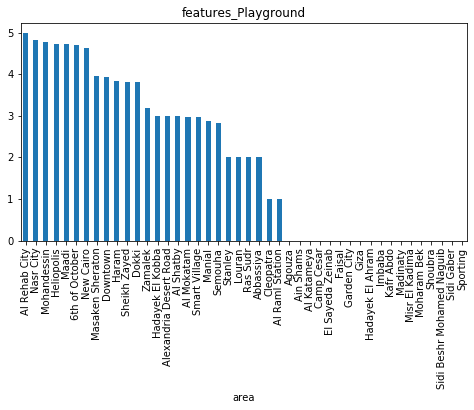

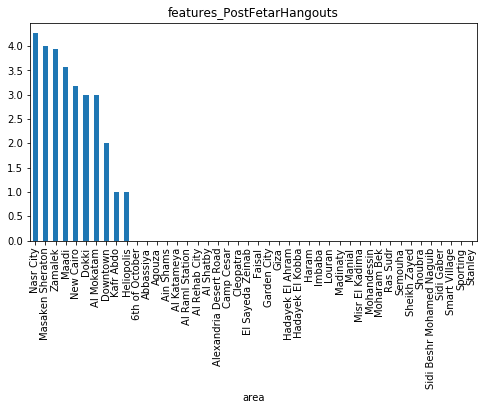

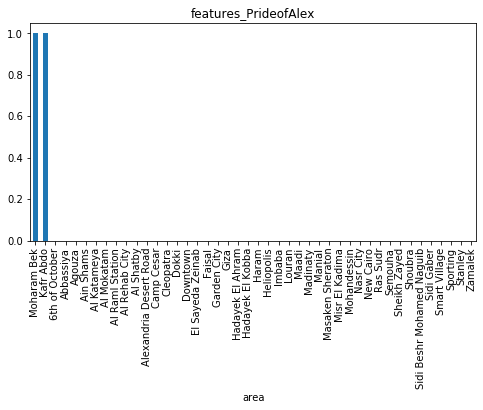

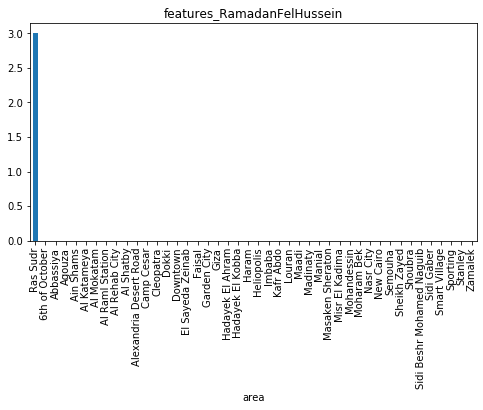

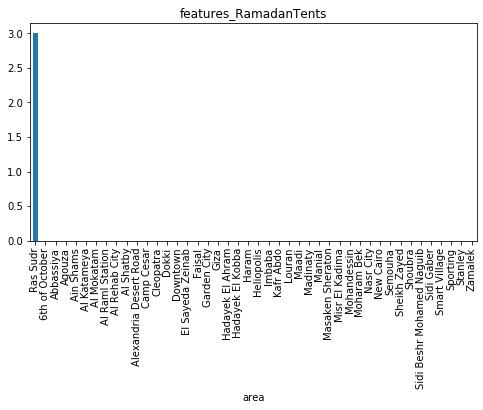

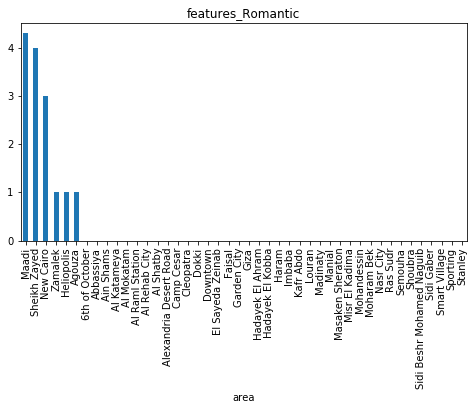

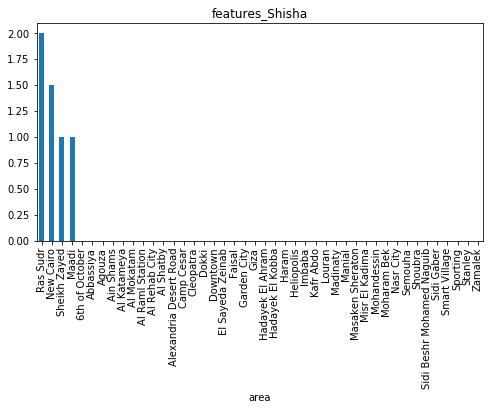

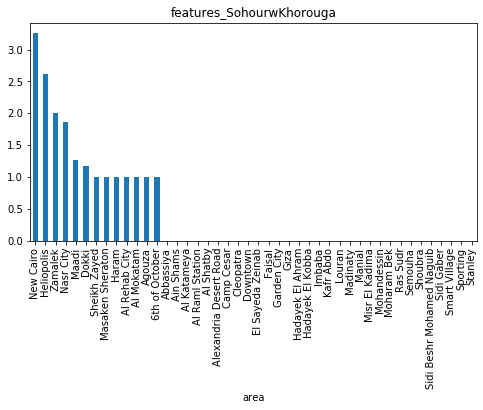

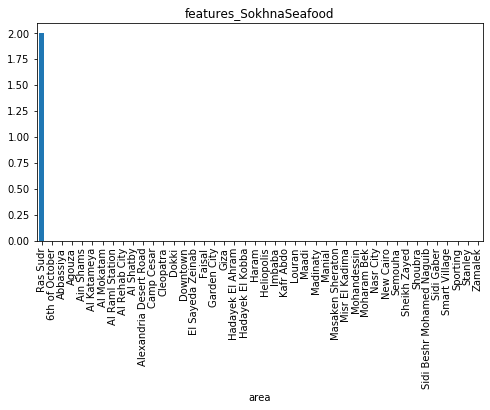

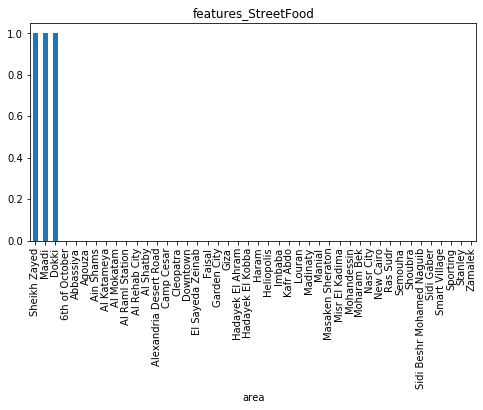

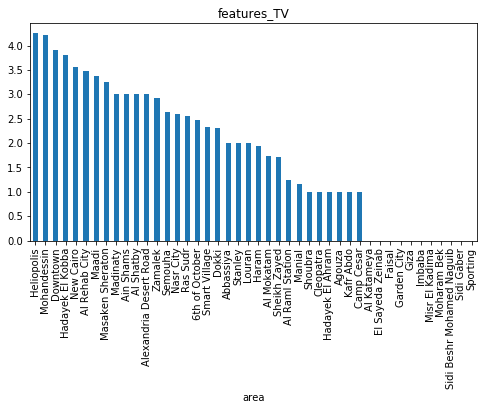

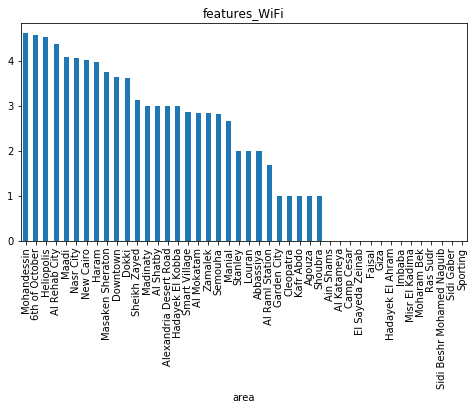

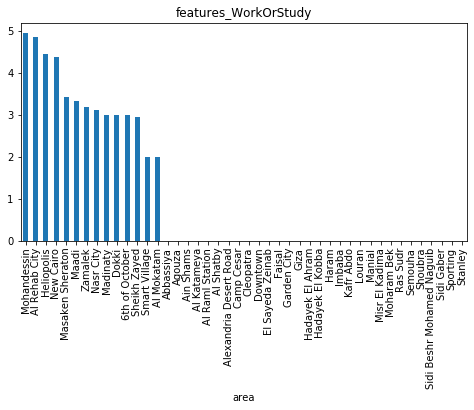

In [0]:
for i in range(len(weighted_features.columns)):
  weighted_features[weighted_features.columns[i]].sort_values(ascending=False).plot(kind='bar', title=weighted_features.columns[i], figsize=(8,4))
  plt.show()

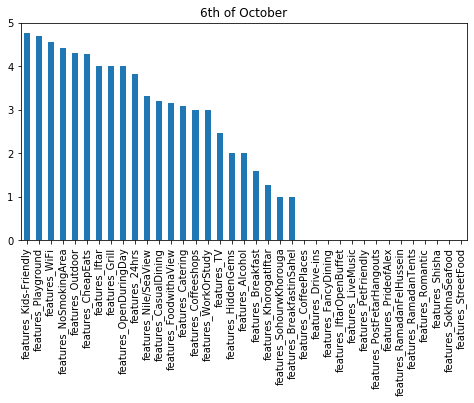

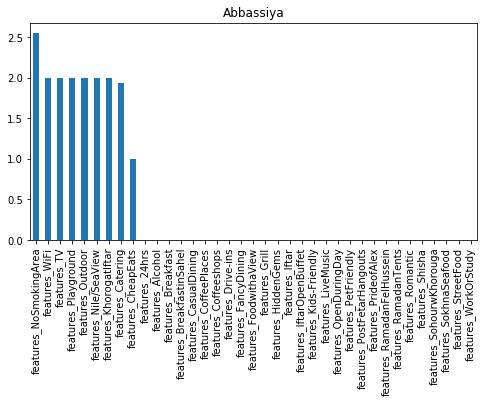

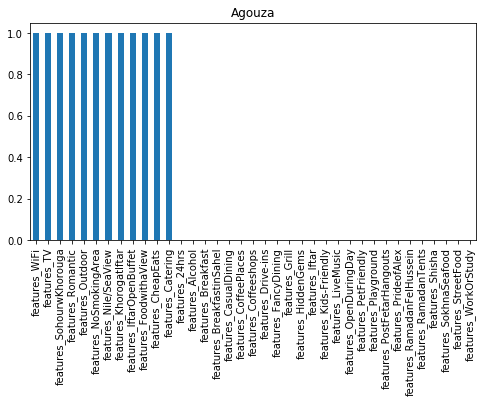

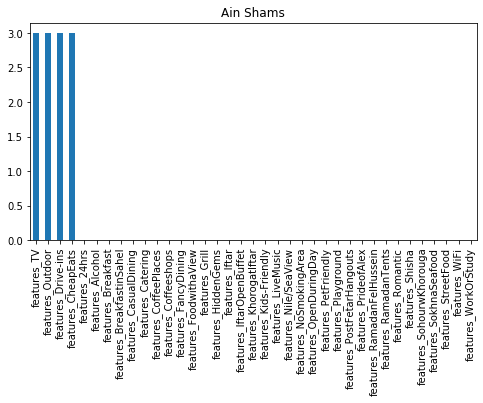

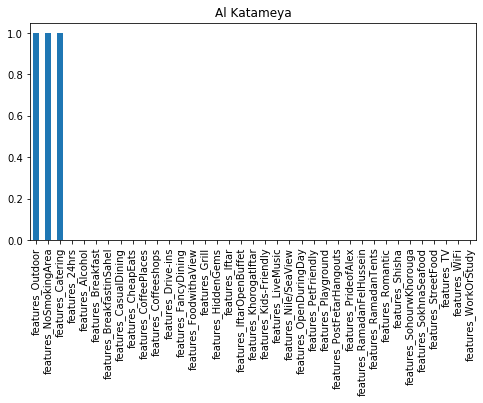

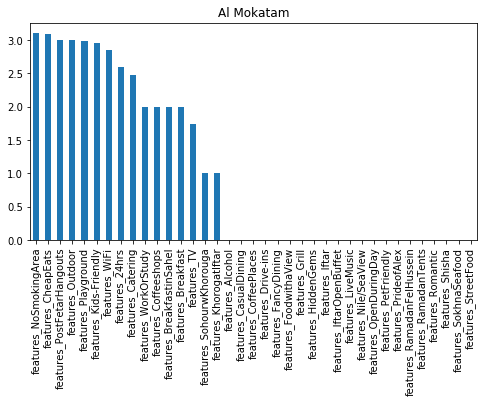

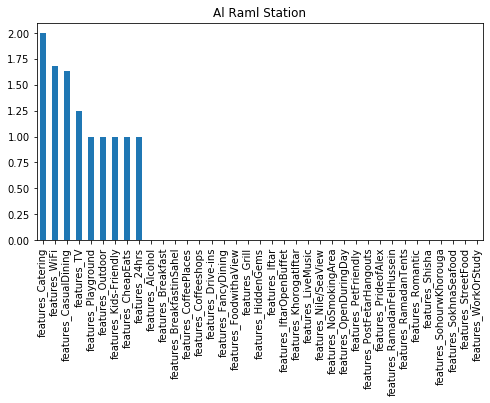

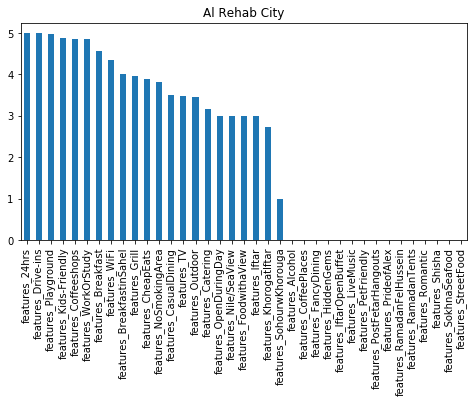

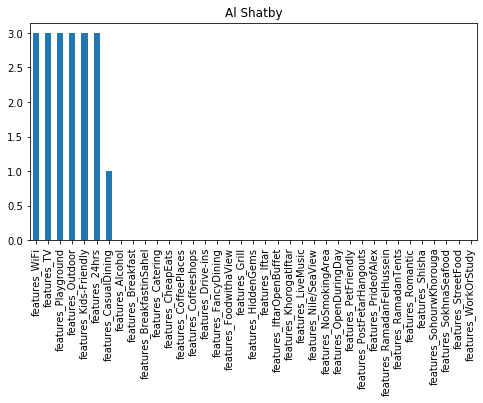

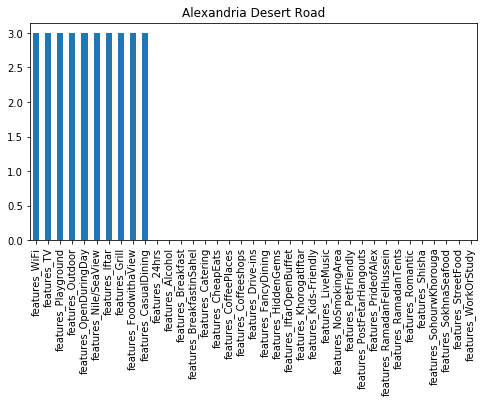

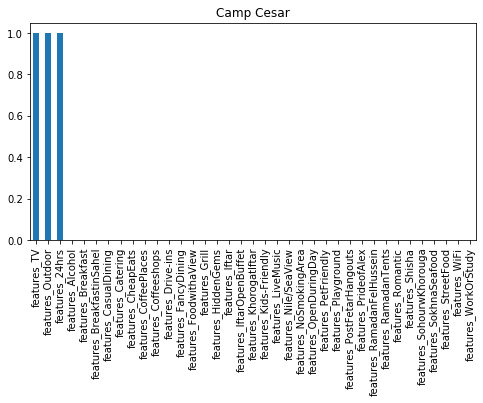

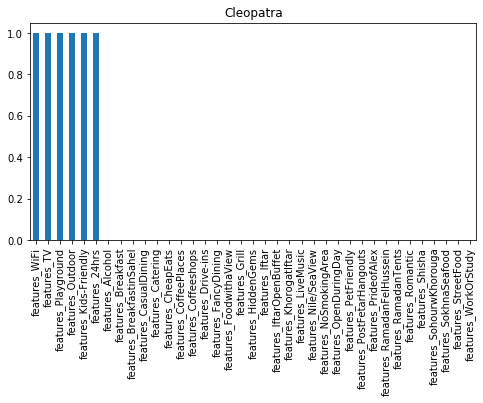

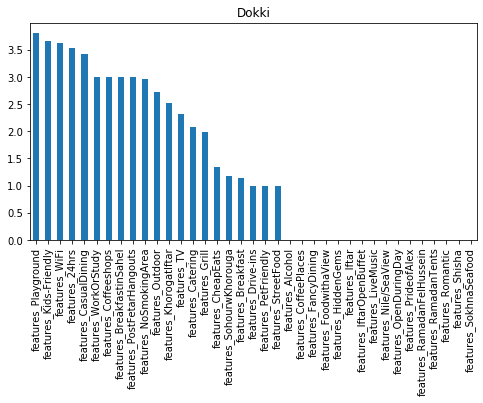

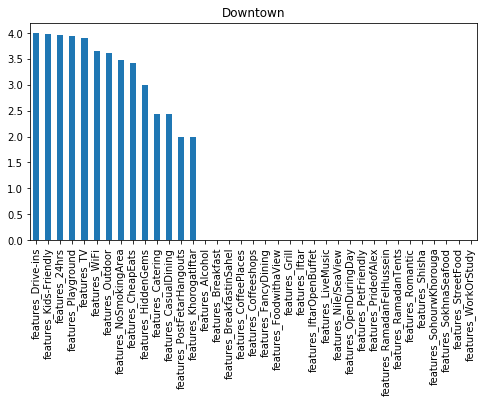

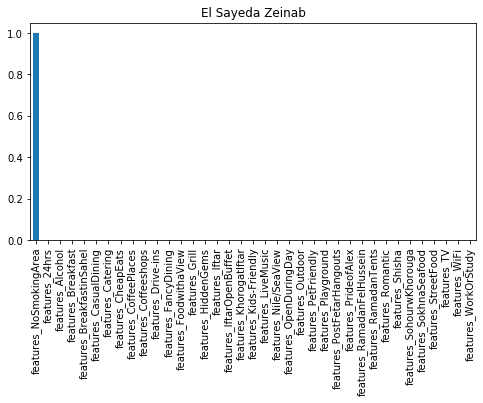

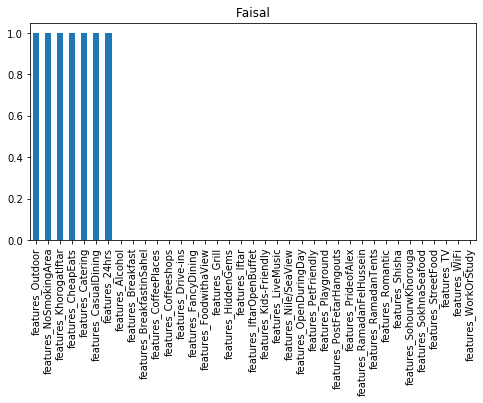

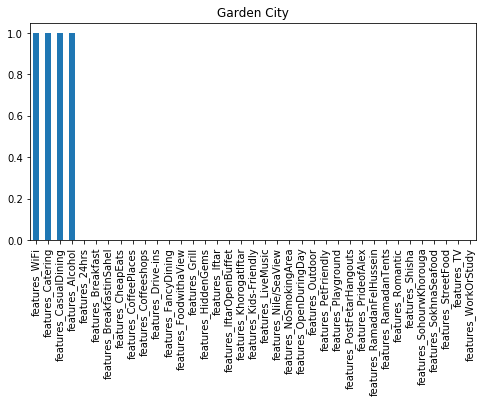

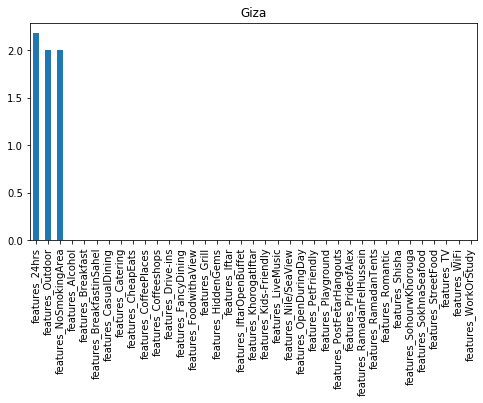

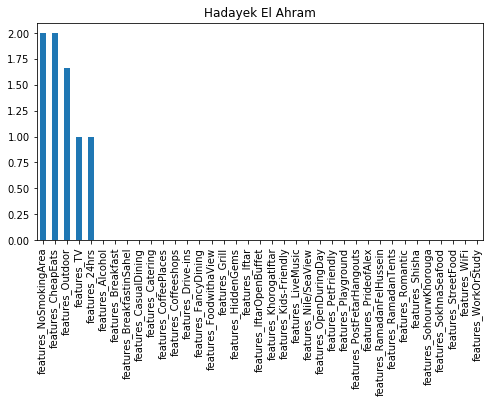

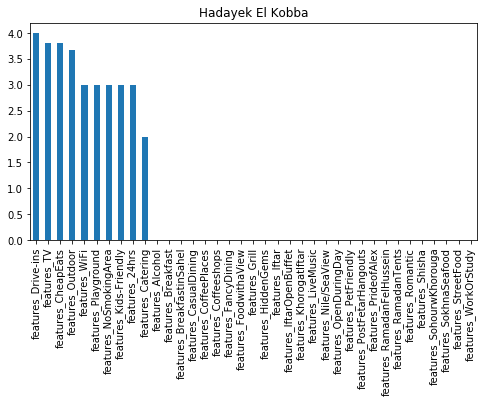

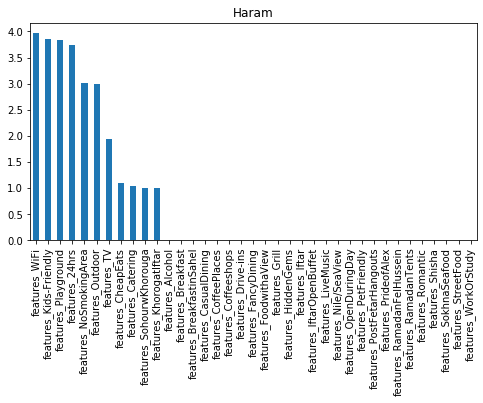

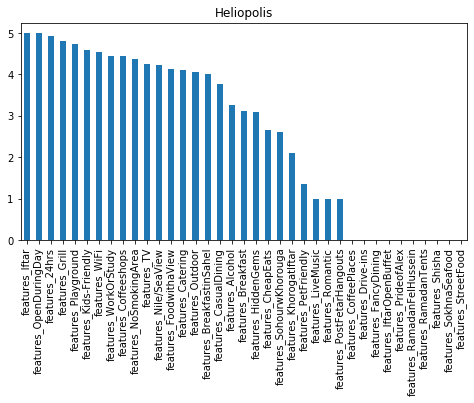

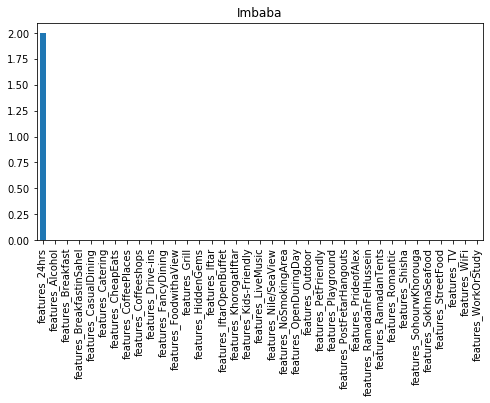

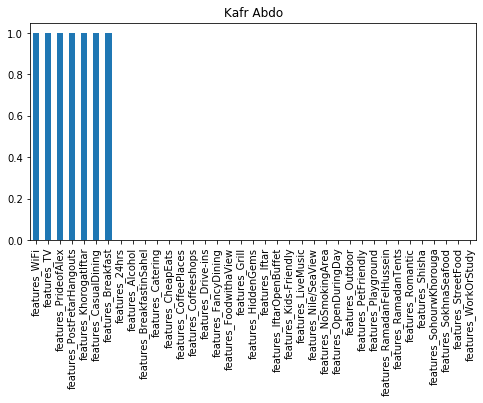

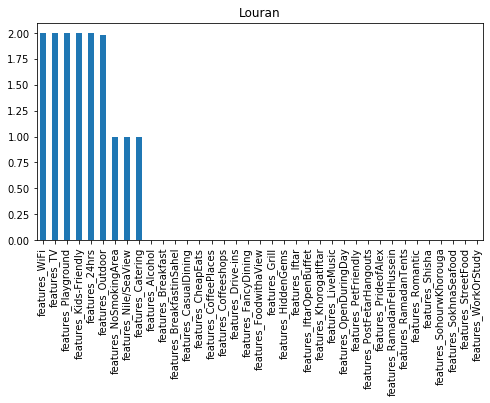

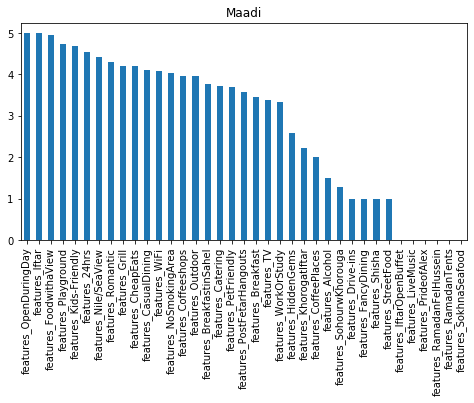

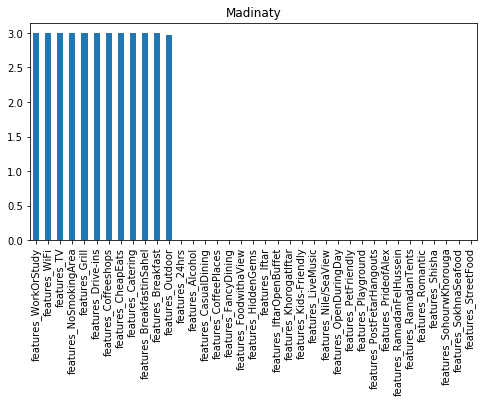

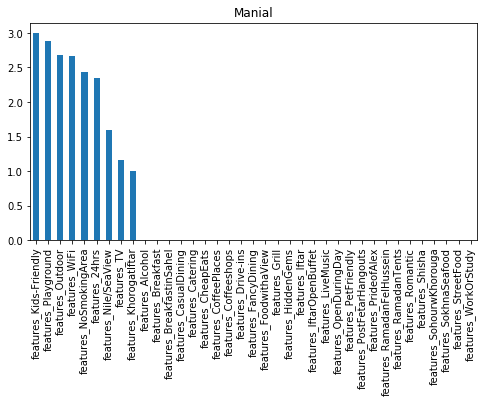

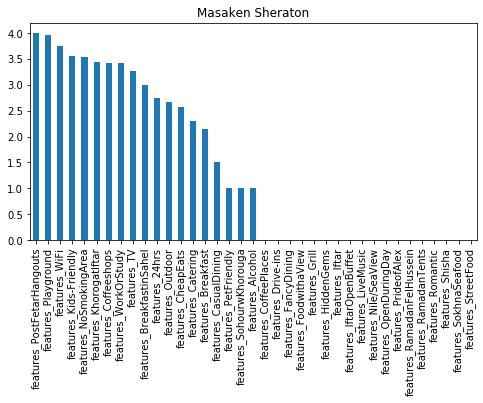

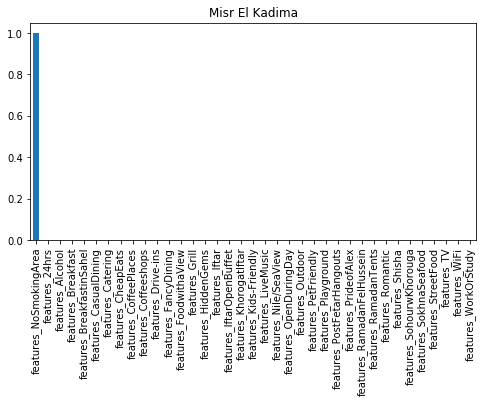

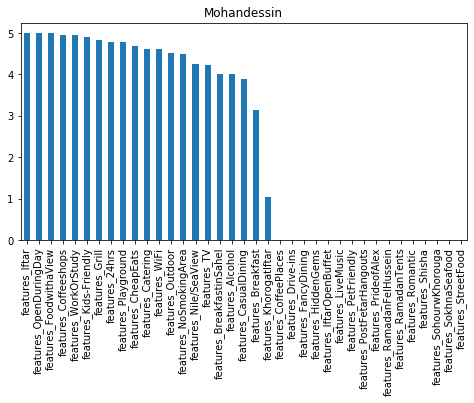

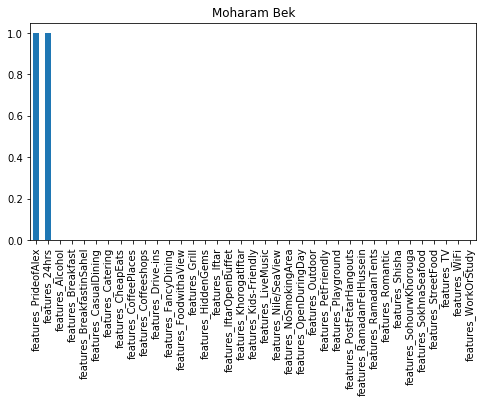

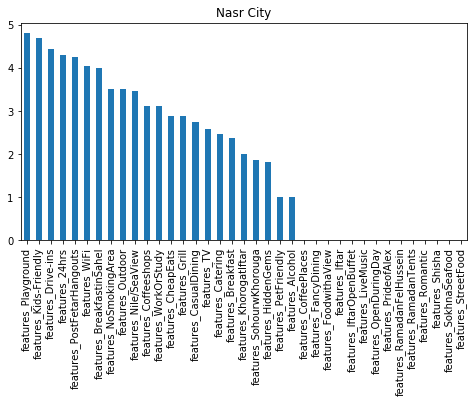

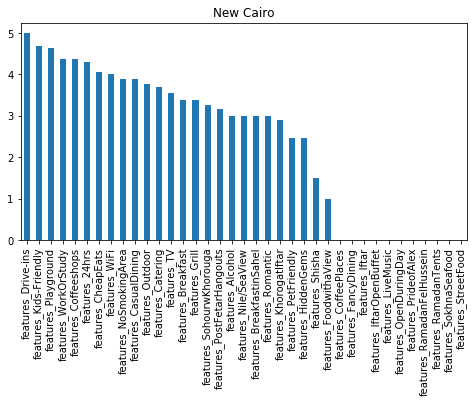

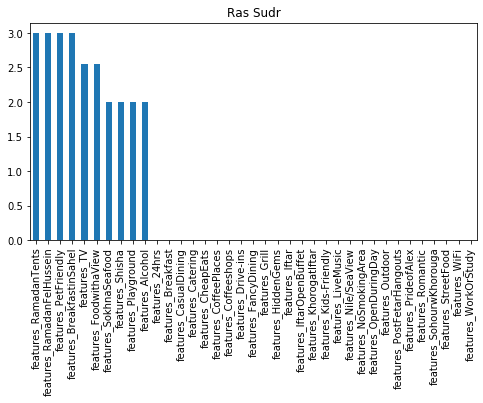

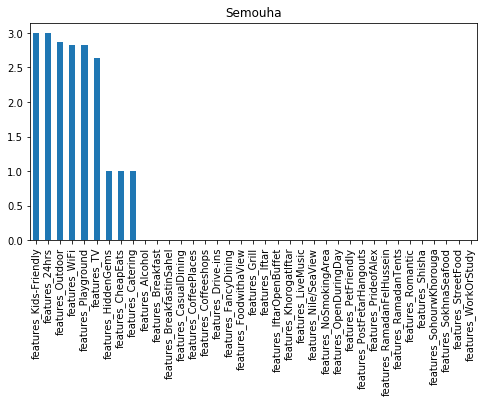

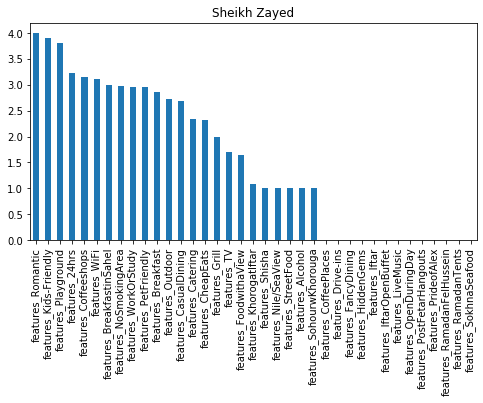

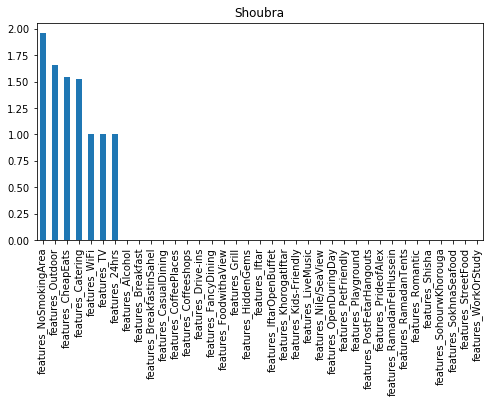

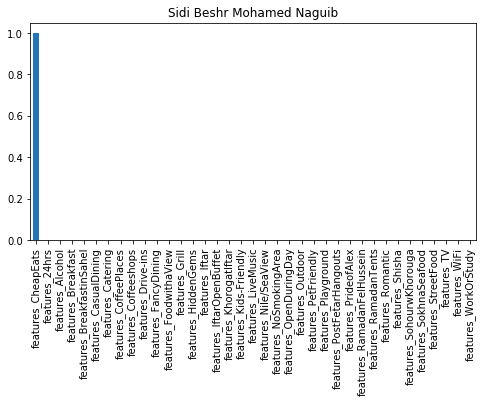

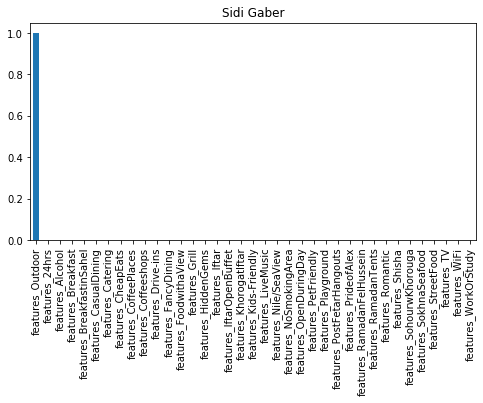

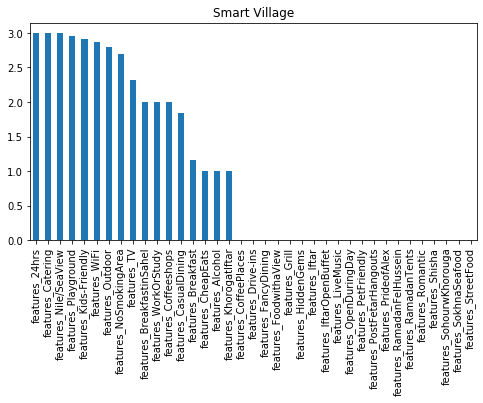

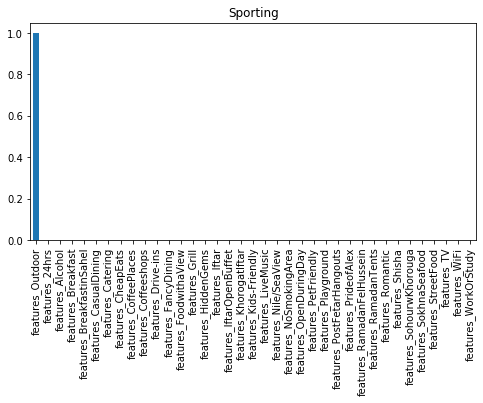

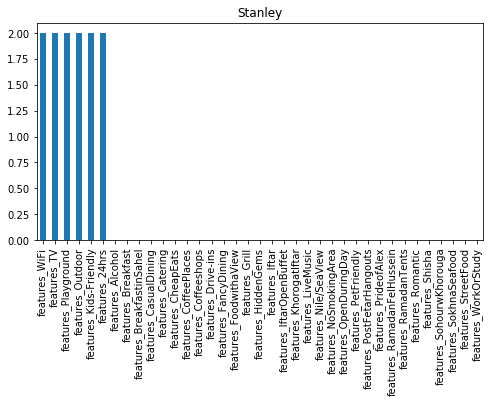

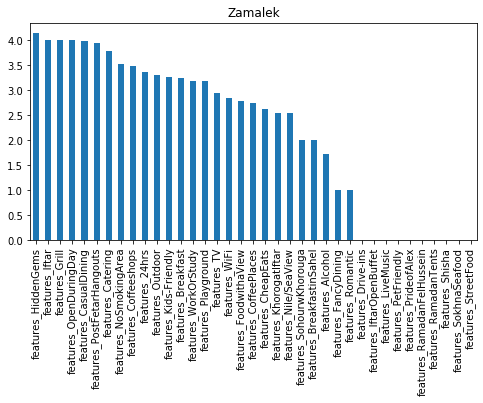

In [0]:
for i in range(len(weighted_features.index)):
  weighted_features.loc[weighted_features.index[i]].sort_values(ascending=False).plot(kind='bar', title=weighted_features.index[i], figsize=(8,4))
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
areas_ratings_dict = areasz.to_dict('index')
for i in areas_ratings_dict.keys():
  areas_ratings_dict[i] = list(areas_ratings_dict[i].values())

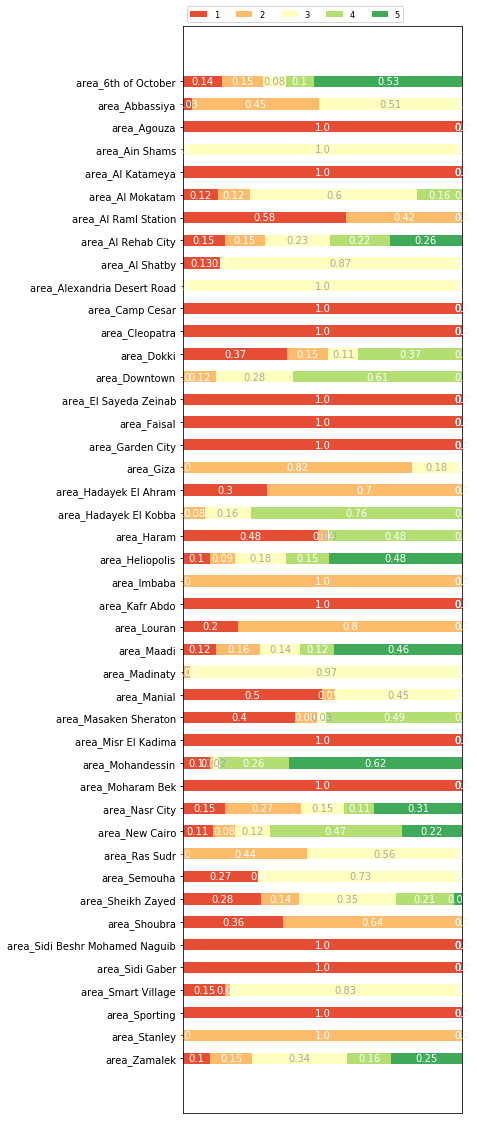

In [0]:
category_names = ['1', '2', '3', '4', '5']

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(5, 20))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(round(float(c),2)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(areas_ratings_dict, category_names)
plt.show()

In [0]:
areas_ratings_dict

{'area_6th of October': [502.0, 519.0, 296.0, 363.0, 1898.0],
 'area_Abbassiya': [7.0, 99.0, 112.0, 0.0, 0.0],
 'area_Agouza': [115.0, 0.0, 0.0, 0.0, 0.0],
 'area_Ain Shams': [0.0, 0.0, 65.0, 0.0, 0.0],
 'area_Al Katameya': [12.0, 0.0, 0.0, 0.0, 0.0],
 'area_Al Mokatam': [41.0, 39.0, 198.0, 53.0, 0.0],
 'area_Al Raml Station': [31.0, 22.0, 0.0, 0.0, 0.0],
 'area_Al Rehab City': [514.0, 503.0, 794.0, 741.0, 891.0],
 'area_Al Shatby': [8.0, 0.0, 53.0, 0.0, 0.0],
 'area_Alexandria Desert Road': [0.0, 0.0, 5.0, 0.0, 0.0],
 'area_Camp Cesar': [3.0, 0.0, 0.0, 0.0, 0.0],
 'area_Cleopatra': [30.0, 0.0, 0.0, 0.0, 0.0],
 'area_Dokki': [587.0, 231.0, 168.0, 585.0, 0.0],
 'area_Downtown': [2.0, 100.0, 236.0, 518.0, 0.0],
 'area_El Sayeda Zeinab': [21.0, 0.0, 0.0, 0.0, 0.0],
 'area_Faisal': [227.0, 0.0, 0.0, 0.0, 0.0],
 'area_Garden City': [36.0, 0.0, 0.0, 0.0, 0.0],
 'area_Giza': [0.0, 32.0, 7.0, 0.0, 0.0],
 'area_Hadayek El Ahram': [21.0, 49.0, 0.0, 0.0, 0.0],
 'area_Hadayek El Kobba': [0.0, 23.0

In [0]:
def donut(names, data, title):

  fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

  recipe = names
  data = data
  wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0)

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                  horizontalalignment=horizontalalignment, **kw)

  ax.set_title(title)

  plt.show()

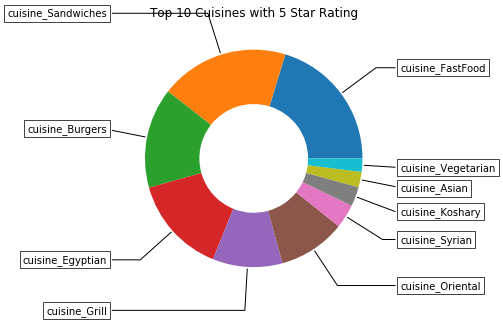

In [0]:
donut(ratings5_cuisines.sort_values(ascending=False).index[:10], ratings5_cuisines.sort_values(ascending=False).values[:10], "Top 10 Cuisines with 5 Star Rating")

In [0]:
ratings5_cuisines.sort_values(ascending=False).index

Index(['cuisine_FastFood', 'cuisine_Sandwiches', 'cuisine_Burgers',
       'cuisine_Egyptian', 'cuisine_Grill', 'cuisine_Oriental',
       'cuisine_Syrian', 'cuisine_Koshary', 'cuisine_Asian',
       'cuisine_Vegetarian', 'cuisine_Chicken', 'cuisine_International',
       'cuisine_Chinese', 'cuisine_Sushi', 'cuisine_Japanese',
       'cuisine_Steaks', 'cuisine_BakeriesandPastries', 'cuisine_Pizza',
       'cuisine_FoulweTa3meya', 'cuisine_Desserts', 'cuisine_Italian',
       'cuisine_Tex-Mex', 'cuisine_American', 'cuisine_Indian',
       'cuisine_European', 'cuisine_Thai', 'cuisine_German', 'cuisine_Mexican',
       'cuisine_Tartsandchocolates'],
      dtype='object')

In [0]:
areas_ratings = pd.concat([train_data.area,train_data_cleaned.Ratings], axis=1).groupby('area').mean()

In [0]:
top_ten_areas = areas_ratings.sort_values('Ratings',ascending=False)[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


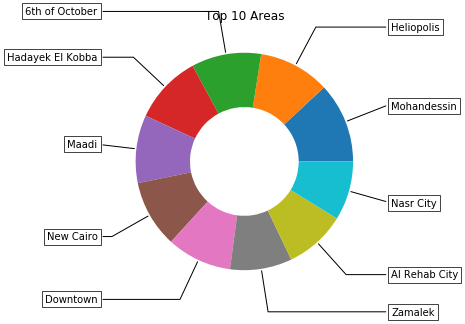

In [0]:
donut(top_ten_areas.index, top_ten_areas.values, "Top 10 Areas")

In [0]:
pd.concat([train_data.area,train_data_cleaned.Ratings], axis=1).groupby('area').describe()

Ratings                                             
                             count      mean       std  min  25%  50%  75%  max
area                                                                           
6th of October              3578.0  3.736724  1.545145  1.0  2.0  5.0  5.0  5.0
Abbassiya                    218.0  2.481651  0.561542  1.0  2.0  3.0  3.0  3.0
Agouza                       115.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Ain Shams                     65.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0
Al Katameya                   12.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Al Mokatam                   331.0  2.794562  0.856402  1.0  3.0  3.0  3.0  4.0
Al Raml Station               53.0  1.415094  0.497454  1.0  1.0  1.0  2.0  2.0
Al Rehab City               3443.0  3.288121  1.382444  1.0  2.0  3.0  5.0  5.0
Al Shatby                     61.0  2.737705  0.680726  1.0  3.0  3.0  3.0  3.0
Alexandria Desert Road         5.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0
Camp Cesar                     3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Cleopatra                     30.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Dokki                       1571.0  2.478039  1.320102  1.0  1.0  2.0  4.0  4.0
Downtown                     856.0  3.483645  0.705675  1.0  3.0  4.0  4.0  4.0
El Sayeda Zeinab              21.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Faisal                       227.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Garden City                   36.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Giza                          39.0  2.179487  0.388776  2.0  2.0  2.0  2.0  3.0
Hadayek El Ahram              70.0  1.700000  0.461566  1.0  1.0  2.0  2.0  2.0
Hadayek El Kobba             288.0  3.677083  0.616183  2.0  4.0  4.0  4.0  4.0
Haram                        439.0  2.471526  1.473816  1.0  1.0  2.0  4.0  4.0
Heliopolis                  9663.0  3.824899  1.365805  1.0  3.0  4.0  5.0  5.0
Imbaba                        18.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0
Kafr Abdo                      8.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Louran                        51.0  1.803922  0.400979  1.0  2.0  2.0  2.0  2.0
Maadi                      10946.0  3.641696  1.474210  1.0  2.0  4.0  5.0  5.0
Madinaty                     235.0  2.974468  0.158071  2.0  3.0  3.0  3.0  3.0
Manial                       326.0  1.953988  0.977138  1.0  1.0  1.5  3.0  3.0
Masaken Sheraton            1105.0  2.608145  1.419113  1.0  1.0  3.0  4.0  4.0
Misr El Kadima                 5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Mohandessin                 5947.0  4.292753  1.204831  1.0  4.0  5.0  5.0  5.0
Moharam Bek                    3.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Nasr City                   8881.0  3.164058  1.488922  1.0  2.0  3.0  5.0  5.0
New Cairo                  10210.0  3.611557  1.212848  1.0  3.0  4.0  4.0  5.0
Ras Sudr                       9.0  2.555556  0.527046  2.0  2.0  3.0  3.0  3.0
Semouha                      152.0  2.460526  0.890580  1.0  1.0  3.0  3.0  3.0
Sheikh Zayed                1733.0  2.568379  1.181347  1.0  1.0  3.0  3.0  5.0
Shoubra                       39.0  1.641026  0.485971  1.0  1.0  2.0  2.0  2.0
Sidi Beshr Mohamed Naguib     13.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Sidi Gaber                     1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
Smart Village                191.0  2.680628  0.723727  1.0  3.0  3.0  3.0  3.0
Sporting                       9.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Stanley                       49.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0
Zamalek                     3095.0  3.318901  1.268718  1.0  3.0  3.0  5.0  5.0

In [0]:
train_data_cleaned = train_data_cleaned.drop(["restaurant_uuid", "Ratings"], axis=1)

In [0]:
data_des = pd.Series(data=[0,0,0,0,0,0,0,0], name='red')
for i in train_data_cleaned.columns:
  col = train_data_cleaned[i]*train_data.Ratings
  if i!="discounted":
    col = col[(col.T != 0)]
  col = col.rename(i)
  data_des = pd.concat([data_des, col.describe()], axis=1)
data_des = data_des.drop([0,1,2,3,4,5,6,7], axis=0).drop("red", axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [0]:
data_des.T

25%   50%   75%  ...       mean  min       std
discounted               0.0   0.0   0.0  ...   3.696648  0.0  8.007464
area_6th of October      4.0  25.0  25.0  ...  16.349916  1.0  9.969059
area_Abbassiya           4.0   9.0   9.0  ...   6.472477  1.0  2.655604
area_Agouza              1.0   1.0   1.0  ...   1.000000  1.0  0.000000
area_Ain Shams           9.0   9.0   9.0  ...   9.000000  9.0  0.000000
...                      ...   ...   ...  ...        ...  ...       ...
features_SokhnaSeafood   4.0   4.0   4.0  ...   4.000000  4.0  0.000000
features_StreetFood      1.0   1.0   1.0  ...   1.000000  1.0  0.000000
features_TV              4.0  16.0  25.0  ...  14.207384  1.0  8.628212
features_WiFi           16.0  25.0  25.0  ...  18.369958  1.0  7.679506
features_WorkOrStudy     9.0  16.0  25.0  ...  15.586656  1.0  8.454035

[118 rows x 8 columns]